In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib import pyplot
from keras.layers import Dense
from numpy.random import randn
from keras.models import Sequential

In [3]:

data = pd.read_csv('german_credit_data.csv')
data2=data

**Getting the information of the diabetes dataset**

In [4]:
print(data.shape)

(1000, 21)


In [5]:
print(data.head())

  checking_status  duration                  credit_history  \
0              <0         6  critical/other existing credit   
1        0<=X<200        48                   existing paid   
2     no checking        12  critical/other existing credit   
3              <0        42                   existing paid   
4              <0        24              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv           1169  no known savings        >=7   
1             radio/tv           5951              <100     1<=X<4   
2            education           2096              <100     4<=X<7   
3  furniture/equipment           7882              <100     4<=X<7   
4              new car           4870              <100     1<=X<4   

   installment_commitment     personal_status other_parties  ...  \
0                       4         male single          none  ...   
1                       2  female div/dep/mar          none  ...

In [6]:
print(data.columns)

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')


In [7]:
data.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [10]:
data['class'].unique()

array(['good', 'bad'], dtype=object)

**Find base accuracy of the original diabetes dataset**

In [192]:
from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()
cat_col=['checking_status',  'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties',
        'property_magnitude', 'other_payment_plans',
       'housing', 'job', 'own_telephone',
       'foreign_worker']

In [193]:
 ## oe map tracking
enc= OrdinalEncoder()    
data=data2
mapping_dict = {}
reverse_dict = {}
#data = pd.DataFrame(enc.fit_transform(data[cat_col]),columns=cat_col)

encoded_data = data.copy()
encoded_data[cat_col] = enc.fit_transform(encoded_data[cat_col])

# Get the mapping from the encoder
mapping_dict = {}
for i, col in enumerate(cat_col):
    mapping_dict[col] = dict(zip(enc.categories_[i], range(len(enc.categories_[i]))))

# Display the encoded data
print(encoded_data)
print(mapping_dict) 

     checking_status  duration  credit_history  purpose  credit_amount  \
0             1.0000         6          1.0000   6.0000           1169   
1             0.0000        48          3.0000   6.0000           5951   
2             3.0000        12          1.0000   2.0000           2096   
3             1.0000        42          3.0000   3.0000           7882   
4             1.0000        24          2.0000   4.0000           4870   
..               ...       ...             ...      ...            ...   
995           3.0000        12          3.0000   3.0000           1736   
996           1.0000        30          3.0000   9.0000           3857   
997           3.0000        12          3.0000   6.0000            804   
998           1.0000        45          3.0000   6.0000           1845   
999           0.0000        45          1.0000   9.0000           4576   

     savings_status  employment  installment_commitment  personal_status  \
0            4.0000      3.0000    

In [13]:
data=encoded_data
data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1.0,6,1.0,6.0,1169,4.0,3.0,4,3.0,2.0,...,3.0,67,1.0,1.0,2,1.0,1,1.0,1.0,good
1,0.0,48,3.0,6.0,5951,2.0,0.0,2,0.0,2.0,...,3.0,22,1.0,1.0,1,1.0,1,0.0,1.0,bad
2,3.0,12,1.0,2.0,2096,2.0,1.0,2,3.0,2.0,...,3.0,49,1.0,1.0,1,3.0,2,0.0,1.0,good
3,1.0,42,3.0,3.0,7882,2.0,1.0,2,3.0,1.0,...,1.0,45,1.0,0.0,1,1.0,2,0.0,1.0,good
4,1.0,24,2.0,4.0,4870,2.0,0.0,3,3.0,2.0,...,2.0,53,1.0,0.0,2,1.0,2,0.0,1.0,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,12,3.0,3.0,1736,2.0,1.0,3,0.0,2.0,...,3.0,31,1.0,1.0,1,3.0,1,0.0,1.0,good
996,1.0,30,3.0,9.0,3857,2.0,0.0,4,1.0,2.0,...,1.0,40,1.0,1.0,1,0.0,1,1.0,1.0,good
997,3.0,12,3.0,6.0,804,2.0,3.0,4,3.0,2.0,...,0.0,38,1.0,1.0,1,1.0,1,0.0,1.0,good
998,1.0,45,3.0,6.0,1845,2.0,0.0,4,3.0,2.0,...,2.0,23,1.0,0.0,1,1.0,1,1.0,1.0,bad


In [14]:
features = ['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker']

label = ['class']
x = data[features]
y = data[label]

In [15]:
mapping = {'good': 1, 'bad': 0}
data['class']=data['class'].map(mapping)
y=data['class']
y

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: class, Length: 1000, dtype: int64

In [16]:
print(y)

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: class, Length: 1000, dtype: int64


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

x_true_train, x_true_test, y_true_train, y_true_test = train_test_split(
    x, y, test_size=0.30, random_state=42)

clf_true = RandomForestClassifier(n_estimators=100)
clf_true.fit(x_true_train, y_true_train)

y_true_pred = clf_true.predict(x_true_test)

print("Base Accuracy: ",
      metrics.accuracy_score(y_true_test, y_true_pred))
print("Base classification report: ",
      metrics.classification_report(y_true_test, y_true_pred))

Base Accuracy:  0.75
Base classification report:                precision    recall  f1-score   support

           0       0.67      0.34      0.45        91
           1       0.76      0.93      0.84       209

    accuracy                           0.75       300
   macro avg       0.72      0.63      0.65       300
weighted avg       0.74      0.75      0.72       300



In [18]:
x.shape

(1000, 20)

In [19]:
data.shape

(1000, 21)

In [20]:
print(y_true_test)

521    0
737    1
740    1
660    1
411    1
      ..
468    1
935    0
428    1
7      1
155    0
Name: class, Length: 300, dtype: int64


**Build a GAN neural networks**

In [21]:
# generate point in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
  # generate points in the latent space
  x_input = randn(latent_dim * n_samples)
  # reshape into a batch of inputs for the network
  x_input = x_input.reshape(n_samples, latent_dim)
  return x_input

In [22]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
  # generate points in latent space
  x_input = generate_latent_points(latent_dim, n_samples)
  # predict outputs
  x = generator.predict(x_input)
  # create class labels
  y = np.zeros((n_samples, 1))
  return x,y

In [23]:
# generate n real samples with class labels
def generate_real_samples(n):
  x = data.sample(n)

  # generate class labels
  y = np.ones((n, 1))
  return x, y

In [33]:
# define the standalone generator model
def define_generator(latent_dim, n_outputs=21):
  model = Sequential()
  model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
  model.add(Dense(30, activation='relu'))
  # model.add(Dense(n_outputs, activation='sigmoid'))
  model.add(Dense(n_outputs, activation='linear'))
  return model

In [35]:
generator1 = define_generator(10, 21)
generator1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 15)                165       
                                                                 
 dense_16 (Dense)            (None, 30)                480       
                                                                 
 dense_17 (Dense)            (None, 21)                651       
                                                                 
Total params: 1,296
Trainable params: 1,296
Non-trainable params: 0
_________________________________________________________________


In [36]:
# define the standalone discriminator model
def define_discriminator(n_inputs=21):
  model = Sequential()
  model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [37]:
discriminator1 = define_discriminator(21)
discriminator1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 25)                550       
                                                                 
 dense_19 (Dense)            (None, 50)                1300      
                                                                 
 dense_20 (Dense)            (None, 1)                 51        
                                                                 
Total params: 1,901
Trainable params: 1,901
Non-trainable params: 0
_________________________________________________________________


In [38]:
# define the combined generator and disciminator model, for updating the generator
def define_gan(generator, discriminator):
  # make weights in the discriminator not trainable
  discriminator.trainable = False
  # connect them
  model = Sequential()
  # add generator
  model.add(generator)
  # add discriminator
  model.add(discriminator)
  # compile model
  model.compile(loss='binary_crossentropy', optimizer='adam')
  return model

In [39]:
# create a line plot of loss for the gan and save to file
def plot_history(d_hist, g_hist):
  # plot loss
  plt.subplot(1, 1, 1)
  plt.plot(d_hist, label='d')
  plt.plot(g_hist, label='gen')
  plt.show()
  # plt.savefig('results_baseline/plot_line_plot_loss.png')
  plt.close()

In [40]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128):
  
  # determine half the size of one batch, for updating the discriminator
  half_batch = int(n_batch / 2)

  d_history = []
  g_history = []
  
  # manually enumerate epochs
  for epoch in range(n_epochs):
    # prepare real samples
    x_real, y_real = generate_real_samples(half_batch)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
    # update discriminator
    d_loss_real, d_real_acc = d_model.train_on_batch(x_real, y_real)
    d_loss_fake, d_fake_acc = d_model.train_on_batch(x_fake, y_fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
    # prepare points in latent space as input for the generator
    x_gan = generate_latent_points(latent_dim, n_batch)
    
    # create inverted labels for the fake samples
    y_gan = np.ones((n_batch, 1))
    
    # update the generator via the discriminator's error
    g_loss_fake = gan_model.train_on_batch(x_gan, y_gan)

    print('>%d, d1=%.3f, d2=%.3f d=%.3f g=%.3f' % (epoch+1, d_loss_real, d_loss_fake, d_loss,  g_loss_fake))
    d_history.append(d_loss)
    g_history.append(g_loss_fake)

  plot_history(d_history, g_history)

  g_model.save('trained_generated_model_20210205_v3.h5')

In [41]:
# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
	# prepare real samples
	x_real, y_real = generate_real_samples(n)
	# evaluate discriminator on real examples
	_, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
	# evaluate discriminator on fake examples
	_, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print(epoch, acc_real, acc_fake)
  # scatter plot real and fake data points
	pyplot.scatter(x_real[:, 0], color='red')
	pyplot.scatter(x_fake[:, 0], color='blue')
	pyplot.show()

2/2 [==============================] - 0s 0s/step
>1, d1=383.116, d2=0.545 d=191.830 g=0.941
2/2 [==============================] - 0s 0s/step
>2, d1=336.919, d2=0.530 d=168.725 g=0.931
2/2 [==============================] - 0s 0s/step
>3, d1=375.620, d2=0.546 d=188.083 g=0.913
2/2 [==============================] - 0s 16ms/step
>4, d1=319.306, d2=0.524 d=159.915 g=0.889
2/2 [==============================] - 0s 8ms/step
>5, d1=197.339, d2=0.540 d=98.940 g=0.937
2/2 [==============================] - 0s 0s/step
>6, d1=154.112, d2=0.555 d=77.333 g=0.918
2/2 [==============================] - 0s 0s/step
>7, d1=102.850, d2=0.539 d=51.695 g=0.954
2/2 [==============================] - 0s 8ms/step
>8, d1=32.003, d2=0.531 d=16.267 g=0.934
2/2 [==============================] - 0s 0s/step
>9, d1=0.000, d2=0.543 d=0.272 g=0.968
2/2 [==============================] - 0s 0s/step
>10, d1=0.000, d2=0.526 d=0.263 g=0.935
2/2 [==============================] - 0s 0s/step
>11, d1=0.000, d2=0.541 d=0.

2/2 [==============================] - 0s 28ms/step
>91, d1=0.008, d2=0.230 d=0.119 g=1.680
2/2 [==============================] - 0s 8ms/step
>92, d1=0.028, d2=0.242 d=0.135 g=1.637
2/2 [==============================] - 0s 36ms/step
>93, d1=0.000, d2=0.237 d=0.118 g=1.620
2/2 [==============================] - 0s 8ms/step
>94, d1=0.000, d2=0.247 d=0.124 g=1.571
2/2 [==============================] - 0s 8ms/step
>95, d1=0.000, d2=0.239 d=0.119 g=1.620
2/2 [==============================] - 0s 4ms/step
>96, d1=0.000, d2=0.252 d=0.126 g=1.531
2/2 [==============================] - 0s 4ms/step
>97, d1=0.000, d2=0.265 d=0.133 g=1.586
2/2 [==============================] - 0s 8ms/step
>98, d1=0.000, d2=0.255 d=0.128 g=1.564
2/2 [==============================] - 0s 4ms/step
>99, d1=0.000, d2=0.255 d=0.128 g=1.552
2/2 [==============================] - 0s 4ms/step
>100, d1=0.000, d2=0.233 d=0.116 g=1.555
2/2 [==============================] - 0s 4ms/step
>101, d1=0.000, d2=0.236 d=0.118 g=1

2/2 [==============================] - 0s 5ms/step
>180, d1=0.000, d2=0.097 d=0.049 g=2.510
2/2 [==============================] - 0s 4ms/step
>181, d1=0.000, d2=0.093 d=0.047 g=2.527
2/2 [==============================] - 0s 3ms/step
>182, d1=0.000, d2=0.096 d=0.048 g=2.520
2/2 [==============================] - 0s 5ms/step
>183, d1=0.000, d2=0.094 d=0.047 g=2.523
2/2 [==============================] - 0s 4ms/step
>184, d1=0.000, d2=0.088 d=0.044 g=2.569
2/2 [==============================] - 0s 3ms/step
>185, d1=0.000, d2=0.093 d=0.046 g=2.490
2/2 [==============================] - 0s 3ms/step
>186, d1=0.000, d2=0.094 d=0.047 g=2.556
2/2 [==============================] - 0s 3ms/step
>187, d1=0.000, d2=0.093 d=0.046 g=2.535
2/2 [==============================] - 0s 4ms/step
>188, d1=0.000, d2=0.090 d=0.045 g=2.567
2/2 [==============================] - 0s 3ms/step
>189, d1=0.000, d2=0.093 d=0.046 g=2.534
2/2 [==============================] - 0s 3ms/step
>190, d1=0.000, d2=0.085 d=0.

2/2 [==============================] - 0s 3ms/step
>269, d1=0.019, d2=0.047 d=0.033 g=3.308
2/2 [==============================] - 0s 6ms/step
>270, d1=0.000, d2=0.046 d=0.023 g=3.247
2/2 [==============================] - 0s 3ms/step
>271, d1=0.000, d2=0.041 d=0.021 g=3.253
2/2 [==============================] - 0s 3ms/step
>272, d1=0.000, d2=0.045 d=0.022 g=3.321
2/2 [==============================] - 0s 4ms/step
>273, d1=0.000, d2=0.044 d=0.022 g=3.370
2/2 [==============================] - 0s 3ms/step
>274, d1=0.001, d2=0.043 d=0.022 g=3.292
2/2 [==============================] - 0s 3ms/step
>275, d1=0.002, d2=0.043 d=0.022 g=3.284
2/2 [==============================] - 0s 4ms/step
>276, d1=0.000, d2=0.041 d=0.020 g=3.348
2/2 [==============================] - 0s 3ms/step
>277, d1=0.000, d2=0.040 d=0.020 g=3.274
2/2 [==============================] - 0s 3ms/step
>278, d1=0.000, d2=0.039 d=0.019 g=3.340
2/2 [==============================] - 0s 3ms/step
>279, d1=0.000, d2=0.040 d=0.

2/2 [==============================] - 0s 4ms/step
>358, d1=0.002, d2=0.020 d=0.011 g=4.089
2/2 [==============================] - 0s 4ms/step
>359, d1=0.000, d2=0.019 d=0.009 g=4.098
2/2 [==============================] - 0s 4ms/step
>360, d1=0.000, d2=0.019 d=0.010 g=3.980
2/2 [==============================] - 0s 8ms/step
>361, d1=0.140, d2=0.022 d=0.081 g=3.899
2/2 [==============================] - 0s 4ms/step
>362, d1=0.000, d2=0.023 d=0.011 g=3.770
2/2 [==============================] - 0s 4ms/step
>363, d1=0.000, d2=0.027 d=0.014 g=3.680
2/2 [==============================] - 0s 4ms/step
>364, d1=0.000, d2=0.030 d=0.015 g=3.626
2/2 [==============================] - 0s 4ms/step
>365, d1=0.000, d2=0.034 d=0.017 g=3.491
2/2 [==============================] - 0s 4ms/step
>366, d1=0.000, d2=0.037 d=0.018 g=3.510
2/2 [==============================] - 0s 0s/step
>367, d1=0.000, d2=0.038 d=0.019 g=3.439
2/2 [==============================] - 0s 4ms/step
>368, d1=0.000, d2=0.038 d=0.0

2/2 [==============================] - 0s 4ms/step
>447, d1=0.000, d2=0.019 d=0.009 g=4.282
2/2 [==============================] - 0s 2ms/step
>448, d1=0.000, d2=0.018 d=0.009 g=4.295
2/2 [==============================] - 0s 4ms/step
>449, d1=0.000, d2=0.016 d=0.008 g=4.370
2/2 [==============================] - 0s 0s/step
>450, d1=0.000, d2=0.016 d=0.008 g=4.416
2/2 [==============================] - 0s 4ms/step
>451, d1=0.001, d2=0.016 d=0.008 g=4.404
2/2 [==============================] - 0s 4ms/step
>452, d1=0.000, d2=0.018 d=0.009 g=4.311
2/2 [==============================] - 0s 0s/step
>453, d1=0.000, d2=0.017 d=0.009 g=4.395
2/2 [==============================] - 0s 4ms/step
>454, d1=0.000, d2=0.018 d=0.009 g=4.354
2/2 [==============================] - 0s 4ms/step
>455, d1=0.000, d2=0.019 d=0.010 g=4.362
2/2 [==============================] - 0s 0s/step
>456, d1=0.000, d2=0.019 d=0.010 g=4.297
2/2 [==============================] - 0s 4ms/step
>457, d1=0.000, d2=0.018 d=0.009

2/2 [==============================] - 0s 4ms/step
>536, d1=0.000, d2=0.008 d=0.004 g=5.071
2/2 [==============================] - 0s 0s/step
>537, d1=0.000, d2=0.007 d=0.004 g=5.034
2/2 [==============================] - 0s 4ms/step
>538, d1=0.000, d2=0.008 d=0.004 g=5.073
2/2 [==============================] - 0s 4ms/step
>539, d1=0.000, d2=0.008 d=0.004 g=5.064
2/2 [==============================] - 0s 4ms/step
>540, d1=0.033, d2=0.009 d=0.021 g=4.915
2/2 [==============================] - 0s 0s/step
>541, d1=0.000, d2=0.010 d=0.005 g=4.776
2/2 [==============================] - 0s 4ms/step
>542, d1=0.000, d2=0.010 d=0.005 g=4.747
2/2 [==============================] - 0s 4ms/step
>543, d1=0.000, d2=0.011 d=0.006 g=4.574
2/2 [==============================] - 0s 4ms/step
>544, d1=0.000, d2=0.012 d=0.006 g=4.573
2/2 [==============================] - 0s 4ms/step
>545, d1=0.000, d2=0.013 d=0.006 g=4.580
2/2 [==============================] - 0s 0s/step
>546, d1=0.000, d2=0.011 d=0.006

2/2 [==============================] - 0s 4ms/step
>625, d1=0.000, d2=0.006 d=0.003 g=5.495
2/2 [==============================] - 0s 5ms/step
>626, d1=0.000, d2=0.007 d=0.004 g=5.609
2/2 [==============================] - 0s 3ms/step
>627, d1=0.000, d2=0.007 d=0.003 g=5.567
2/2 [==============================] - 0s 3ms/step
>628, d1=0.000, d2=0.013 d=0.006 g=5.247
2/2 [==============================] - 0s 5ms/step
>629, d1=0.000, d2=0.010 d=0.005 g=5.155
2/2 [==============================] - 0s 4ms/step
>630, d1=0.000, d2=0.010 d=0.005 g=4.964
2/2 [==============================] - 0s 6ms/step
>631, d1=0.000, d2=0.016 d=0.008 g=4.677
2/2 [==============================] - 0s 4ms/step
>632, d1=0.000, d2=0.020 d=0.010 g=4.560
2/2 [==============================] - 0s 4ms/step
>633, d1=0.000, d2=0.017 d=0.008 g=4.506
2/2 [==============================] - 0s 4ms/step
>634, d1=0.000, d2=0.032 d=0.016 g=4.143
2/2 [==============================] - 0s 6ms/step
>635, d1=0.000, d2=0.028 d=0.

2/2 [==============================] - 0s 4ms/step
>714, d1=0.000, d2=0.029 d=0.015 g=3.772
2/2 [==============================] - 0s 4ms/step
>715, d1=0.006, d2=0.039 d=0.022 g=3.540
2/2 [==============================] - 0s 6ms/step
>716, d1=0.000, d2=0.038 d=0.019 g=3.635
2/2 [==============================] - 0s 10ms/step
>717, d1=0.000, d2=0.044 d=0.022 g=3.750
2/2 [==============================] - 0s 9ms/step
>718, d1=0.000, d2=0.037 d=0.019 g=3.988
2/2 [==============================] - 0s 3ms/step
>719, d1=0.000, d2=0.024 d=0.012 g=4.097
2/2 [==============================] - 0s 7ms/step
>720, d1=0.001, d2=0.019 d=0.010 g=4.210
2/2 [==============================] - 0s 7ms/step
>721, d1=0.000, d2=0.020 d=0.010 g=4.471
2/2 [==============================] - 0s 7ms/step
>722, d1=0.000, d2=0.020 d=0.010 g=4.493
2/2 [==============================] - 0s 3ms/step
>723, d1=0.000, d2=0.016 d=0.008 g=4.564
2/2 [==============================] - 0s 4ms/step
>724, d1=0.000, d2=0.018 d=0

2/2 [==============================] - 0s 3ms/step
>803, d1=0.000, d2=0.052 d=0.026 g=3.774
2/2 [==============================] - 0s 3ms/step
>804, d1=0.000, d2=0.050 d=0.025 g=3.564
2/2 [==============================] - 0s 4ms/step
>805, d1=0.000, d2=0.044 d=0.022 g=3.592
2/2 [==============================] - 0s 9ms/step
>806, d1=0.000, d2=0.041 d=0.020 g=3.718
2/2 [==============================] - 0s 7ms/step
>807, d1=0.000, d2=0.043 d=0.021 g=3.954
2/2 [==============================] - 0s 4ms/step
>808, d1=0.000, d2=0.032 d=0.016 g=3.985
2/2 [==============================] - 0s 3ms/step
>809, d1=0.000, d2=0.029 d=0.014 g=4.081
2/2 [==============================] - 0s 3ms/step
>810, d1=0.001, d2=0.029 d=0.015 g=4.341
2/2 [==============================] - 0s 5ms/step
>811, d1=0.000, d2=0.037 d=0.019 g=4.255
2/2 [==============================] - 0s 3ms/step
>812, d1=0.000, d2=0.033 d=0.016 g=4.198
2/2 [==============================] - 0s 3ms/step
>813, d1=0.027, d2=0.043 d=0.

2/2 [==============================] - 0s 2ms/step
>892, d1=0.000, d2=0.036 d=0.018 g=3.986
2/2 [==============================] - 0s 3ms/step
>893, d1=0.010, d2=0.036 d=0.023 g=4.098
2/2 [==============================] - 0s 3ms/step
>894, d1=0.000, d2=0.033 d=0.016 g=4.241
2/2 [==============================] - 0s 10ms/step
>895, d1=0.142, d2=0.040 d=0.091 g=4.088
2/2 [==============================] - 0s 5ms/step
>896, d1=0.000, d2=0.039 d=0.020 g=3.788
2/2 [==============================] - 0s 9ms/step
>897, d1=0.000, d2=0.052 d=0.026 g=3.915
2/2 [==============================] - 0s 5ms/step
>898, d1=0.127, d2=0.072 d=0.100 g=3.868
2/2 [==============================] - 0s 11ms/step
>899, d1=0.092, d2=0.063 d=0.077 g=4.004
2/2 [==============================] - 0s 9ms/step
>900, d1=0.000, d2=0.039 d=0.020 g=4.301
2/2 [==============================] - 0s 4ms/step
>901, d1=0.001, d2=0.029 d=0.015 g=4.417
2/2 [==============================] - 0s 6ms/step
>902, d1=0.039, d2=0.030 d=

2/2 [==============================] - 0s 3ms/step
>981, d1=0.000, d2=0.009 d=0.005 g=4.931
2/2 [==============================] - 0s 3ms/step
>982, d1=0.000, d2=0.010 d=0.005 g=4.825
2/2 [==============================] - 0s 4ms/step
>983, d1=0.000, d2=0.009 d=0.005 g=4.929
2/2 [==============================] - 0s 4ms/step
>984, d1=0.000, d2=0.009 d=0.004 g=4.939
2/2 [==============================] - 0s 3ms/step
>985, d1=0.019, d2=0.009 d=0.014 g=4.886
2/2 [==============================] - 0s 4ms/step
>986, d1=0.064, d2=0.011 d=0.037 g=4.585
2/2 [==============================] - 0s 4ms/step
>987, d1=0.000, d2=0.017 d=0.009 g=4.323
2/2 [==============================] - 0s 8ms/step
>988, d1=0.000, d2=0.019 d=0.010 g=4.051
2/2 [==============================] - 0s 4ms/step
>989, d1=0.000, d2=0.023 d=0.012 g=3.930
2/2 [==============================] - 0s 4ms/step
>990, d1=0.000, d2=0.025 d=0.012 g=3.900
2/2 [==============================] - 0s 3ms/step
>991, d1=0.000, d2=0.023 d=0.

2/2 [==============================] - 0s 4ms/step
>1069, d1=0.010, d2=0.027 d=0.018 g=3.713
2/2 [==============================] - 0s 4ms/step
>1070, d1=0.007, d2=0.041 d=0.024 g=3.503
2/2 [==============================] - 0s 32ms/step
>1071, d1=0.002, d2=0.036 d=0.019 g=3.551
2/2 [==============================] - 0s 12ms/step
>1072, d1=0.001, d2=0.034 d=0.018 g=3.719
2/2 [==============================] - 0s 8ms/step
>1073, d1=0.001, d2=0.028 d=0.015 g=3.937
2/2 [==============================] - 0s 4ms/step
>1074, d1=0.015, d2=0.023 d=0.019 g=4.107
2/2 [==============================] - 0s 8ms/step
>1075, d1=0.000, d2=0.020 d=0.010 g=4.307
2/2 [==============================] - 0s 16ms/step
>1076, d1=0.015, d2=0.018 d=0.017 g=4.251
2/2 [==============================] - 0s 8ms/step
>1077, d1=0.023, d2=0.024 d=0.024 g=3.878
2/2 [==============================] - 0s 4ms/step
>1078, d1=0.016, d2=0.031 d=0.024 g=3.474
2/2 [==============================] - 0s 4ms/step
>1079, d1=0.000,

2/2 [==============================] - 0s 4ms/step
>1157, d1=0.000, d2=0.038 d=0.019 g=3.473
2/2 [==============================] - 0s 0s/step
>1158, d1=0.000, d2=0.061 d=0.031 g=3.730
2/2 [==============================] - 0s 4ms/step
>1159, d1=0.000, d2=0.078 d=0.039 g=3.794
2/2 [==============================] - 0s 0s/step
>1160, d1=0.053, d2=0.037 d=0.045 g=4.026
2/2 [==============================] - 0s 4ms/step
>1161, d1=0.005, d2=0.037 d=0.021 g=4.097
2/2 [==============================] - 0s 4ms/step
>1162, d1=0.000, d2=0.034 d=0.017 g=4.173
2/2 [==============================] - 0s 4ms/step
>1163, d1=0.000, d2=0.031 d=0.016 g=4.282
2/2 [==============================] - 0s 4ms/step
>1164, d1=0.000, d2=0.019 d=0.009 g=4.485
2/2 [==============================] - 0s 4ms/step
>1165, d1=0.000, d2=0.019 d=0.009 g=4.741
2/2 [==============================] - 0s 4ms/step
>1166, d1=0.000, d2=0.016 d=0.008 g=4.793
2/2 [==============================] - 0s 4ms/step
>1167, d1=0.000, d2=0

2/2 [==============================] - 0s 4ms/step
>1245, d1=0.093, d2=0.048 d=0.071 g=3.860
2/2 [==============================] - 0s 0s/step
>1246, d1=0.043, d2=0.028 d=0.035 g=4.223
2/2 [==============================] - 0s 0s/step
>1247, d1=0.170, d2=0.027 d=0.098 g=4.119
2/2 [==============================] - 0s 4ms/step
>1248, d1=0.022, d2=0.032 d=0.027 g=3.786
2/2 [==============================] - 0s 4ms/step
>1249, d1=0.064, d2=0.059 d=0.061 g=3.336
2/2 [==============================] - 0s 4ms/step
>1250, d1=0.008, d2=0.066 d=0.037 g=3.095
2/2 [==============================] - 0s 4ms/step
>1251, d1=0.000, d2=0.071 d=0.035 g=3.197
2/2 [==============================] - 0s 4ms/step
>1252, d1=0.161, d2=0.058 d=0.109 g=3.618
2/2 [==============================] - 0s 4ms/step
>1253, d1=0.354, d2=0.045 d=0.199 g=3.422
2/2 [==============================] - 0s 4ms/step
>1254, d1=0.034, d2=0.067 d=0.050 g=3.548
2/2 [==============================] - 0s 1ms/step
>1255, d1=0.000, d2=0

>1333, d1=0.006, d2=0.099 d=0.052 g=2.825
2/2 [==============================] - 0s 0s/step
>1334, d1=0.031, d2=0.159 d=0.095 g=3.516
2/2 [==============================] - 0s 12ms/step
>1335, d1=0.000, d2=0.024 d=0.012 g=4.979
2/2 [==============================] - 0s 16ms/step
>1336, d1=0.004, d2=0.005 d=0.004 g=6.415
2/2 [==============================] - 0s 0s/step
>1337, d1=0.013, d2=0.002 d=0.007 g=7.123
2/2 [==============================] - 0s 0s/step
>1338, d1=0.132, d2=0.001 d=0.067 g=6.764
2/2 [==============================] - 0s 0s/step
>1339, d1=0.006, d2=0.003 d=0.004 g=6.094
2/2 [==============================] - 0s 0s/step
>1340, d1=0.001, d2=0.005 d=0.003 g=5.538
2/2 [==============================] - 0s 0s/step
>1341, d1=0.000, d2=0.009 d=0.005 g=5.063
2/2 [==============================] - 0s 0s/step
>1342, d1=0.008, d2=0.018 d=0.013 g=4.633
2/2 [==============================] - 0s 0s/step
>1343, d1=0.000, d2=0.019 d=0.010 g=4.555
2/2 [=============================

2/2 [==============================] - 0s 0s/step
>1422, d1=0.001, d2=0.017 d=0.009 g=4.907
2/2 [==============================] - 0s 0s/step
>1423, d1=0.000, d2=0.010 d=0.005 g=5.174
2/2 [==============================] - 0s 8ms/step
>1424, d1=0.004, d2=0.006 d=0.005 g=5.433
2/2 [==============================] - 0s 0s/step
>1425, d1=0.000, d2=0.006 d=0.003 g=5.657
2/2 [==============================] - 0s 2ms/step
>1426, d1=0.012, d2=0.005 d=0.009 g=5.539
2/2 [==============================] - 0s 10ms/step
>1427, d1=0.079, d2=0.009 d=0.044 g=5.110
2/2 [==============================] - 0s 10ms/step
>1428, d1=0.034, d2=0.018 d=0.026 g=4.309
2/2 [==============================] - 0s 0s/step
>1429, d1=0.004, d2=0.060 d=0.032 g=3.835
2/2 [==============================] - 0s 10ms/step
>1430, d1=0.024, d2=0.040 d=0.032 g=4.060
2/2 [==============================] - 0s 8ms/step
>1431, d1=0.007, d2=0.043 d=0.025 g=4.447
2/2 [==============================] - 0s 8ms/step
>1432, d1=0.005, d2=

2/2 [==============================] - 0s 0s/step
>1511, d1=0.054, d2=0.063 d=0.058 g=3.293
2/2 [==============================] - 0s 0s/step
>1512, d1=0.000, d2=0.066 d=0.033 g=3.567
2/2 [==============================] - 0s 16ms/step
>1513, d1=0.039, d2=0.041 d=0.040 g=3.929
2/2 [==============================] - 0s 16ms/step
>1514, d1=0.000, d2=0.020 d=0.010 g=4.667
2/2 [==============================] - 0s 9ms/step
>1515, d1=0.075, d2=0.009 d=0.042 g=5.165
2/2 [==============================] - 0s 0s/step
>1516, d1=0.054, d2=0.010 d=0.032 g=4.750
2/2 [==============================] - 0s 0s/step
>1517, d1=0.010, d2=0.016 d=0.013 g=4.466
2/2 [==============================] - 0s 0s/step
>1518, d1=0.072, d2=0.032 d=0.052 g=3.776
2/2 [==============================] - 0s 0s/step
>1519, d1=0.009, d2=0.053 d=0.031 g=3.575
2/2 [==============================] - 0s 0s/step
>1520, d1=0.008, d2=0.036 d=0.022 g=3.965
2/2 [==============================] - 0s 17ms/step
>1521, d1=0.000, d2=0.0

2/2 [==============================] - 0s 0s/step
>1600, d1=0.075, d2=0.049 d=0.062 g=4.307
2/2 [==============================] - 0s 8ms/step
>1601, d1=0.161, d2=0.036 d=0.099 g=4.194
2/2 [==============================] - 0s 0s/step
>1602, d1=0.031, d2=0.039 d=0.035 g=3.983
2/2 [==============================] - 0s 0s/step
>1603, d1=0.125, d2=0.041 d=0.083 g=4.065
2/2 [==============================] - 0s 2ms/step
>1604, d1=0.125, d2=0.040 d=0.082 g=3.943
2/2 [==============================] - 0s 0s/step
>1605, d1=0.056, d2=0.040 d=0.048 g=3.776
2/2 [==============================] - 0s 0s/step
>1606, d1=0.166, d2=0.056 d=0.111 g=3.746
2/2 [==============================] - 0s 0s/step
>1607, d1=0.001, d2=0.026 d=0.014 g=4.419
2/2 [==============================] - 0s 0s/step
>1608, d1=0.002, d2=0.015 d=0.009 g=5.133
2/2 [==============================] - 0s 16ms/step
>1609, d1=0.006, d2=0.008 d=0.007 g=5.541
2/2 [==============================] - 0s 2ms/step
>1610, d1=0.170, d2=0.010

2/2 [==============================] - 0s 0s/step
>1688, d1=1.772, d2=0.566 d=1.169 g=3.775
2/2 [==============================] - 0s 0s/step
>1689, d1=2.801, d2=1.377 d=2.089 g=2.631
2/2 [==============================] - 0s 3ms/step
>1690, d1=0.503, d2=1.662 d=1.082 g=2.764
2/2 [==============================] - 0s 0s/step
>1691, d1=1.150, d2=1.057 d=1.104 g=3.650
2/2 [==============================] - 0s 0s/step
>1692, d1=0.499, d2=0.493 d=0.496 g=5.093
2/2 [==============================] - 0s 0s/step
>1693, d1=1.599, d2=0.273 d=0.936 g=5.251
2/2 [==============================] - 0s 0s/step
>1694, d1=1.745, d2=0.384 d=1.065 g=4.432
2/2 [==============================] - 0s 0s/step
>1695, d1=2.120, d2=0.414 d=1.267 g=2.794
2/2 [==============================] - 0s 8ms/step
>1696, d1=0.726, d2=0.744 d=0.735 g=2.871
2/2 [==============================] - 0s 0s/step
>1697, d1=2.037, d2=0.707 d=1.372 g=2.890
2/2 [==============================] - 0s 0s/step
>1698, d1=0.250, d2=0.787 d=

2/2 [==============================] - 0s 16ms/step
>1776, d1=0.000, d2=0.000 d=0.000 g=21.357
2/2 [==============================] - 0s 0s/step
>1777, d1=0.000, d2=0.000 d=0.000 g=20.985
2/2 [==============================] - 0s 16ms/step
>1778, d1=0.052, d2=0.000 d=0.026 g=13.762
2/2 [==============================] - 0s 9ms/step
>1779, d1=0.000, d2=0.001 d=0.000 g=6.793
2/2 [==============================] - 0s 5ms/step
>1780, d1=0.000, d2=0.441 d=0.221 g=3.457
2/2 [==============================] - 0s 2ms/step
>1781, d1=0.000, d2=0.702 d=0.351 g=5.114
2/2 [==============================] - 0s 10ms/step
>1782, d1=0.000, d2=0.003 d=0.002 g=9.385
2/2 [==============================] - 0s 0s/step
>1783, d1=0.000, d2=0.000 d=0.000 g=13.072
2/2 [==============================] - 0s 0s/step
>1784, d1=0.000, d2=0.000 d=0.000 g=15.580
2/2 [==============================] - 0s 8ms/step
>1785, d1=0.000, d2=0.000 d=0.000 g=17.166
2/2 [==============================] - 0s 10ms/step
>1786, d1=0.

2/2 [==============================] - 0s 0s/step
>1864, d1=0.000, d2=12.898 d=6.449 g=0.000
2/2 [==============================] - 0s 0s/step
>1865, d1=0.000, d2=24.141 d=12.070 g=0.000
2/2 [==============================] - 0s 0s/step
>1866, d1=0.000, d2=35.530 d=17.765 g=0.000
2/2 [==============================] - 0s 0s/step
>1867, d1=0.000, d2=30.604 d=15.302 g=0.000
2/2 [==============================] - 0s 8ms/step
>1868, d1=0.000, d2=24.636 d=12.318 g=0.000
2/2 [==============================] - 0s 0s/step
>1869, d1=0.000, d2=10.897 d=5.448 g=1.252
2/2 [==============================] - 0s 0s/step
>1870, d1=0.000, d2=0.000 d=0.000 g=18.203
2/2 [==============================] - 0s 8ms/step
>1871, d1=0.000, d2=0.000 d=0.000 g=32.163
2/2 [==============================] - 0s 16ms/step
>1872, d1=0.000, d2=0.000 d=0.000 g=42.132
2/2 [==============================] - 0s 0s/step
>1873, d1=0.000, d2=0.000 d=0.000 g=52.808
2/2 [==============================] - 0s 0s/step
>1874, d1=0.

2/2 [==============================] - 0s 0s/step
>1952, d1=0.272, d2=0.036 d=0.154 g=5.012
2/2 [==============================] - 0s 0s/step
>1953, d1=0.015, d2=0.092 d=0.053 g=4.680
2/2 [==============================] - 0s 4ms/step
>1954, d1=0.224, d2=0.117 d=0.171 g=4.939
2/2 [==============================] - 0s 4ms/step
>1955, d1=0.118, d2=0.082 d=0.100 g=5.813
2/2 [==============================] - 0s 4ms/step
>1956, d1=0.001, d2=0.009 d=0.005 g=6.805
2/2 [==============================] - 0s 4ms/step
>1957, d1=0.108, d2=0.003 d=0.055 g=7.119
2/2 [==============================] - 0s 0s/step
>1958, d1=0.448, d2=0.009 d=0.228 g=6.617
2/2 [==============================] - 0s 4ms/step
>1959, d1=0.312, d2=0.012 d=0.162 g=5.712
2/2 [==============================] - 0s 4ms/step
>1960, d1=0.072, d2=0.058 d=0.065 g=4.960
2/2 [==============================] - 0s 4ms/step
>1961, d1=0.000, d2=0.069 d=0.035 g=5.128
2/2 [==============================] - 0s 0s/step
>1962, d1=0.319, d2=0.0

2/2 [==============================] - 0s 4ms/step
>2040, d1=0.277, d2=0.249 d=0.263 g=3.952
2/2 [==============================] - 0s 4ms/step
>2041, d1=0.631, d2=0.436 d=0.533 g=4.354
2/2 [==============================] - 0s 8ms/step
>2042, d1=0.161, d2=0.068 d=0.114 g=6.153
2/2 [==============================] - 0s 4ms/step
>2043, d1=0.896, d2=0.059 d=0.477 g=4.673
2/2 [==============================] - 0s 4ms/step
>2044, d1=1.022, d2=0.558 d=0.790 g=4.053
2/2 [==============================] - 0s 4ms/step
>2045, d1=1.109, d2=0.212 d=0.661 g=5.401
2/2 [==============================] - 0s 8ms/step
>2046, d1=0.680, d2=0.171 d=0.425 g=6.694
2/2 [==============================] - 0s 0s/step
>2047, d1=0.828, d2=0.036 d=0.432 g=7.355
2/2 [==============================] - 0s 4ms/step
>2048, d1=0.543, d2=0.008 d=0.275 g=6.585
2/2 [==============================] - 0s 4ms/step
>2049, d1=0.204, d2=0.135 d=0.169 g=4.941
2/2 [==============================] - 0s 0s/step
>2050, d1=0.108, d2=0

2/2 [==============================] - 0s 4ms/step
>2128, d1=1.139, d2=0.002 d=0.570 g=9.832
2/2 [==============================] - 0s 4ms/step
>2129, d1=0.465, d2=0.000 d=0.233 g=9.909
2/2 [==============================] - 0s 8ms/step
>2130, d1=0.036, d2=0.001 d=0.018 g=8.972
2/2 [==============================] - 0s 4ms/step
>2131, d1=0.144, d2=0.006 d=0.075 g=7.892
2/2 [==============================] - 0s 4ms/step
>2132, d1=0.002, d2=0.032 d=0.017 g=6.600
2/2 [==============================] - 0s 0s/step
>2133, d1=0.467, d2=0.187 d=0.327 g=6.579
2/2 [==============================] - 0s 4ms/step
>2134, d1=0.229, d2=0.104 d=0.166 g=8.383
2/2 [==============================] - 0s 4ms/step
>2135, d1=0.008, d2=0.006 d=0.007 g=9.509
2/2 [==============================] - 0s 2ms/step
>2136, d1=0.741, d2=0.002 d=0.371 g=8.987
2/2 [==============================] - 0s 4ms/step
>2137, d1=0.325, d2=0.014 d=0.169 g=6.778
2/2 [==============================] - 0s 4ms/step
>2138, d1=0.685, d2=

2/2 [==============================] - 0s 4ms/step
>2216, d1=0.451, d2=0.050 d=0.250 g=4.871
2/2 [==============================] - 0s 8ms/step
>2217, d1=0.296, d2=0.036 d=0.166 g=4.947
2/2 [==============================] - 0s 8ms/step
>2218, d1=0.462, d2=0.040 d=0.251 g=4.408
2/2 [==============================] - 0s 0s/step
>2219, d1=0.267, d2=0.146 d=0.206 g=4.764
2/2 [==============================] - 0s 0s/step
>2220, d1=0.051, d2=0.032 d=0.041 g=6.188
2/2 [==============================] - 0s 4ms/step
>2221, d1=0.147, d2=0.007 d=0.077 g=6.654
2/2 [==============================] - 0s 8ms/step
>2222, d1=0.596, d2=0.015 d=0.306 g=5.089
2/2 [==============================] - 0s 4ms/step
>2223, d1=0.280, d2=0.088 d=0.184 g=4.039
2/2 [==============================] - 0s 0s/step
>2224, d1=0.176, d2=0.226 d=0.201 g=4.361
2/2 [==============================] - 0s 4ms/step
>2225, d1=0.194, d2=0.028 d=0.111 g=5.718
2/2 [==============================] - 0s 4ms/step
>2226, d1=0.381, d2=0.

2/2 [==============================] - 0s 4ms/step
>2304, d1=0.020, d2=0.017 d=0.019 g=4.579
2/2 [==============================] - 0s 4ms/step
>2305, d1=0.062, d2=0.031 d=0.046 g=4.532
2/2 [==============================] - 0s 0s/step
>2306, d1=0.001, d2=0.017 d=0.009 g=5.190
2/2 [==============================] - 0s 0s/step
>2307, d1=0.005, d2=0.009 d=0.007 g=5.795
2/2 [==============================] - 0s 0s/step
>2308, d1=0.125, d2=0.006 d=0.066 g=5.333
2/2 [==============================] - 0s 0s/step
>2309, d1=0.038, d2=0.008 d=0.023 g=5.059
2/2 [==============================] - 0s 4ms/step
>2310, d1=0.058, d2=0.019 d=0.039 g=4.274
2/2 [==============================] - 0s 4ms/step
>2311, d1=0.171, d2=0.044 d=0.107 g=3.664
2/2 [==============================] - 0s 4ms/step
>2312, d1=0.020, d2=0.064 d=0.042 g=4.305
2/2 [==============================] - 0s 0s/step
>2313, d1=0.032, d2=0.027 d=0.030 g=4.916
2/2 [==============================] - 0s 0s/step
>2314, d1=0.050, d2=0.006

2/2 [==============================] - 0s 4ms/step
>2392, d1=0.045, d2=0.164 d=0.105 g=3.820
2/2 [==============================] - 0s 4ms/step
>2393, d1=0.341, d2=0.184 d=0.262 g=3.016
2/2 [==============================] - 0s 4ms/step
>2394, d1=0.152, d2=0.189 d=0.171 g=3.771
2/2 [==============================] - 0s 0s/step
>2395, d1=0.148, d2=0.065 d=0.107 g=4.105
2/2 [==============================] - 0s 4ms/step
>2396, d1=0.094, d2=0.050 d=0.072 g=3.796
2/2 [==============================] - 0s 6ms/step
>2397, d1=0.103, d2=0.064 d=0.083 g=3.557
2/2 [==============================] - 0s 4ms/step
>2398, d1=0.010, d2=0.061 d=0.036 g=4.006
2/2 [==============================] - 0s 4ms/step
>2399, d1=0.084, d2=0.043 d=0.064 g=4.564
2/2 [==============================] - 0s 4ms/step
>2400, d1=0.179, d2=0.046 d=0.113 g=3.363
2/2 [==============================] - 0s 4ms/step
>2401, d1=0.052, d2=0.139 d=0.095 g=3.765
2/2 [==============================] - 0s 4ms/step
>2402, d1=0.116, d2=

2/2 [==============================] - 0s 2ms/step
>2480, d1=0.190, d2=0.147 d=0.168 g=4.959
2/2 [==============================] - 0s 0s/step
>2481, d1=0.178, d2=0.164 d=0.171 g=5.776
2/2 [==============================] - 0s 8ms/step
>2482, d1=0.551, d2=0.088 d=0.320 g=5.581
2/2 [==============================] - 0s 0s/step
>2483, d1=0.512, d2=0.162 d=0.337 g=5.883
2/2 [==============================] - 0s 16ms/step
>2484, d1=0.464, d2=0.021 d=0.242 g=6.399
2/2 [==============================] - 0s 0s/step
>2485, d1=0.658, d2=0.027 d=0.342 g=5.510
2/2 [==============================] - 0s 0s/step
>2486, d1=1.038, d2=0.457 d=0.747 g=4.509
2/2 [==============================] - 0s 16ms/step
>2487, d1=0.969, d2=0.339 d=0.654 g=5.752
2/2 [==============================] - 0s 0s/step
>2488, d1=1.291, d2=0.096 d=0.694 g=6.320
2/2 [==============================] - 0s 0s/step
>2489, d1=1.462, d2=0.498 d=0.980 g=4.781
2/2 [==============================] - 0s 0s/step
>2490, d1=1.048, d2=0.53

2/2 [==============================] - 0s 0s/step
>2568, d1=0.194, d2=0.099 d=0.147 g=5.524
2/2 [==============================] - 0s 0s/step
>2569, d1=0.460, d2=0.066 d=0.263 g=5.272
2/2 [==============================] - 0s 16ms/step
>2570, d1=0.161, d2=0.180 d=0.170 g=5.618
2/2 [==============================] - 0s 16ms/step
>2571, d1=0.515, d2=0.113 d=0.314 g=5.674
2/2 [==============================] - 0s 16ms/step
>2572, d1=1.645, d2=0.350 d=0.997 g=5.270
2/2 [==============================] - 0s 0s/step
>2573, d1=1.051, d2=0.156 d=0.603 g=5.024
2/2 [==============================] - 0s 16ms/step
>2574, d1=0.594, d2=0.319 d=0.457 g=5.382
2/2 [==============================] - 0s 0s/step
>2575, d1=0.622, d2=0.183 d=0.403 g=5.886
2/2 [==============================] - 0s 9ms/step
>2576, d1=1.006, d2=0.092 d=0.549 g=5.063
2/2 [==============================] - 0s 0s/step
>2577, d1=0.866, d2=0.517 d=0.691 g=3.561
2/2 [==============================] - 0s 0s/step
>2578, d1=0.193, d2=0

>2656, d1=0.193, d2=0.043 d=0.118 g=5.815
2/2 [==============================] - 0s 0s/step
>2657, d1=0.267, d2=0.174 d=0.220 g=5.799
2/2 [==============================] - 0s 8ms/step
>2658, d1=0.086, d2=0.045 d=0.065 g=6.072
2/2 [==============================] - 0s 16ms/step
>2659, d1=0.478, d2=0.015 d=0.247 g=6.651
2/2 [==============================] - 0s 16ms/step
>2660, d1=0.203, d2=0.017 d=0.110 g=5.276
2/2 [==============================] - 0s 0s/step
>2661, d1=0.183, d2=0.061 d=0.122 g=4.332
2/2 [==============================] - 0s 0s/step
>2662, d1=0.001, d2=0.126 d=0.063 g=4.441
2/2 [==============================] - 0s 0s/step
>2663, d1=0.116, d2=0.066 d=0.091 g=5.536
2/2 [==============================] - 0s 0s/step
>2664, d1=0.030, d2=0.065 d=0.047 g=6.623
2/2 [==============================] - 0s 16ms/step
>2665, d1=0.064, d2=0.007 d=0.036 g=6.739
2/2 [==============================] - 0s 0s/step
>2666, d1=0.178, d2=0.025 d=0.101 g=6.044
2/2 [==========================

2/2 [==============================] - 0s 0s/step
>2745, d1=0.033, d2=0.016 d=0.024 g=7.336
2/2 [==============================] - 0s 0s/step
>2746, d1=0.467, d2=0.015 d=0.241 g=6.725
2/2 [==============================] - 0s 0s/step
>2747, d1=0.154, d2=0.057 d=0.106 g=5.578
2/2 [==============================] - 0s 0s/step
>2748, d1=0.352, d2=0.280 d=0.316 g=5.470
2/2 [==============================] - 0s 0s/step
>2749, d1=0.337, d2=0.052 d=0.194 g=6.477
2/2 [==============================] - 0s 0s/step
>2750, d1=0.383, d2=0.043 d=0.213 g=6.600
2/2 [==============================] - 0s 0s/step
>2751, d1=0.427, d2=0.108 d=0.268 g=5.124
2/2 [==============================] - 0s 0s/step
>2752, d1=0.231, d2=0.361 d=0.296 g=4.573
2/2 [==============================] - 0s 0s/step
>2753, d1=0.300, d2=0.238 d=0.269 g=5.587
2/2 [==============================] - 0s 0s/step
>2754, d1=0.588, d2=0.185 d=0.386 g=4.932
2/2 [==============================] - 0s 0s/step
>2755, d1=0.675, d2=0.159 d=0.

2/2 [==============================] - 0s 0s/step
>2833, d1=0.940, d2=0.158 d=0.549 g=4.882
2/2 [==============================] - 0s 0s/step
>2834, d1=0.654, d2=0.343 d=0.498 g=4.547
2/2 [==============================] - 0s 0s/step
>2835, d1=0.452, d2=0.153 d=0.303 g=5.902
2/2 [==============================] - 0s 0s/step
>2836, d1=0.542, d2=0.029 d=0.286 g=7.044
2/2 [==============================] - 0s 0s/step
>2837, d1=0.760, d2=0.048 d=0.404 g=5.806
2/2 [==============================] - 0s 0s/step
>2838, d1=0.926, d2=0.278 d=0.602 g=5.441
2/2 [==============================] - 0s 0s/step
>2839, d1=0.523, d2=0.343 d=0.433 g=6.272
2/2 [==============================] - 0s 0s/step
>2840, d1=0.767, d2=0.086 d=0.426 g=5.665
2/2 [==============================] - 0s 16ms/step
>2841, d1=0.815, d2=0.219 d=0.517 g=4.385
2/2 [==============================] - 0s 0s/step
>2842, d1=0.518, d2=0.484 d=0.501 g=4.718
2/2 [==============================] - 0s 0s/step
>2843, d1=1.688, d2=1.075 d=

>2921, d1=1.642, d2=0.691 d=1.167 g=5.805
2/2 [==============================] - 0s 0s/step
>2922, d1=0.757, d2=0.161 d=0.459 g=7.902
2/2 [==============================] - 0s 0s/step
>2923, d1=1.151, d2=0.090 d=0.620 g=7.931
2/2 [==============================] - 0s 0s/step
>2924, d1=1.000, d2=0.113 d=0.556 g=6.961
2/2 [==============================] - 0s 0s/step
>2925, d1=0.680, d2=0.248 d=0.464 g=8.097
2/2 [==============================] - 0s 0s/step
>2926, d1=0.211, d2=0.037 d=0.124 g=8.599
2/2 [==============================] - 0s 0s/step
>2927, d1=1.195, d2=0.061 d=0.628 g=8.064
2/2 [==============================] - 0s 0s/step
>2928, d1=0.654, d2=0.018 d=0.336 g=7.025
2/2 [==============================] - 0s 0s/step
>2929, d1=1.724, d2=0.414 d=1.069 g=5.197
2/2 [==============================] - 0s 0s/step
>2930, d1=0.228, d2=0.454 d=0.341 g=7.135
2/2 [==============================] - 0s 8ms/step
>2931, d1=1.028, d2=0.033 d=0.530 g=9.070
2/2 [==============================] 

>3009, d1=0.137, d2=0.188 d=0.162 g=7.073
2/2 [==============================] - 0s 16ms/step
>3010, d1=0.289, d2=0.021 d=0.155 g=7.796
2/2 [==============================] - 0s 16ms/step
>3011, d1=0.315, d2=0.027 d=0.171 g=7.981
2/2 [==============================] - 0s 0s/step
>3012, d1=0.088, d2=0.055 d=0.072 g=7.975
2/2 [==============================] - 0s 16ms/step
>3013, d1=0.246, d2=0.025 d=0.136 g=7.734
2/2 [==============================] - 0s 16ms/step
>3014, d1=0.264, d2=0.097 d=0.181 g=8.564
2/2 [==============================] - 0s 0s/step
>3015, d1=0.298, d2=0.083 d=0.190 g=10.162
2/2 [==============================] - 0s 16ms/step
>3016, d1=0.277, d2=0.005 d=0.141 g=10.922
2/2 [==============================] - 0s 5ms/step
>3017, d1=0.805, d2=0.007 d=0.406 g=8.609
2/2 [==============================] - 0s 16ms/step
>3018, d1=0.665, d2=0.139 d=0.402 g=7.093
2/2 [==============================] - 0s 0s/step
>3019, d1=0.162, d2=0.108 d=0.135 g=8.155
2/2 [==================

>3097, d1=0.328, d2=0.088 d=0.208 g=6.793
2/2 [==============================] - 0s 10ms/step
>3098, d1=0.244, d2=0.071 d=0.158 g=6.294
2/2 [==============================] - 0s 0s/step
>3099, d1=0.572, d2=0.159 d=0.365 g=6.091
2/2 [==============================] - 0s 16ms/step
>3100, d1=0.423, d2=0.067 d=0.245 g=6.195
2/2 [==============================] - 0s 0s/step
>3101, d1=0.555, d2=0.134 d=0.344 g=6.509
2/2 [==============================] - 0s 0s/step
>3102, d1=0.607, d2=0.041 d=0.324 g=5.892
2/2 [==============================] - 0s 0s/step
>3103, d1=0.255, d2=0.197 d=0.226 g=6.312
2/2 [==============================] - 0s 16ms/step
>3104, d1=0.294, d2=0.165 d=0.230 g=7.531
2/2 [==============================] - 0s 0s/step
>3105, d1=0.244, d2=0.020 d=0.132 g=8.454
2/2 [==============================] - 0s 0s/step
>3106, d1=0.359, d2=0.090 d=0.224 g=6.364
2/2 [==============================] - 0s 0s/step
>3107, d1=0.370, d2=0.135 d=0.253 g=5.608
2/2 [===========================

2/2 [==============================] - 0s 16ms/step
>3186, d1=0.108, d2=0.137 d=0.122 g=5.749
2/2 [==============================] - 0s 10ms/step
>3187, d1=0.175, d2=0.014 d=0.094 g=7.202
2/2 [==============================] - 0s 0s/step
>3188, d1=0.172, d2=0.003 d=0.088 g=7.206
2/2 [==============================] - 0s 0s/step
>3189, d1=0.031, d2=0.006 d=0.019 g=6.308
2/2 [==============================] - 0s 0s/step
>3190, d1=0.085, d2=0.059 d=0.072 g=5.979
2/2 [==============================] - 0s 16ms/step
>3191, d1=0.115, d2=0.026 d=0.070 g=6.685
2/2 [==============================] - 0s 0s/step
>3192, d1=0.153, d2=0.021 d=0.087 g=6.620
2/2 [==============================] - 0s 0s/step
>3193, d1=0.032, d2=0.005 d=0.018 g=7.384
2/2 [==============================] - 0s 8ms/step
>3194, d1=0.003, d2=0.002 d=0.003 g=7.428
2/2 [==============================] - 0s 0s/step
>3195, d1=0.052, d2=0.003 d=0.027 g=7.062
2/2 [==============================] - 0s 16ms/step
>3196, d1=0.056, d2=0

2/2 [==============================] - 0s 0s/step
>3275, d1=22.603, d2=23.168 d=22.886 g=0.000
2/2 [==============================] - 0s 0s/step
>3276, d1=0.000, d2=56.442 d=28.221 g=0.000
2/2 [==============================] - 0s 0s/step
>3277, d1=0.000, d2=41.362 d=20.681 g=0.000
2/2 [==============================] - 0s 0s/step
>3278, d1=0.000, d2=0.053 d=0.027 g=29.501
2/2 [==============================] - 0s 8ms/step
>3279, d1=0.000, d2=0.000 d=0.000 g=70.240
2/2 [==============================] - 0s 0s/step
>3280, d1=0.000, d2=0.000 d=0.000 g=98.543
2/2 [==============================] - 0s 0s/step
>3281, d1=2.087, d2=0.000 d=1.043 g=57.345
2/2 [==============================] - 0s 0s/step
>3282, d1=0.000, d2=0.000 d=0.000 g=27.675
2/2 [==============================] - 0s 16ms/step
>3283, d1=0.000, d2=0.006 d=0.003 g=2.121
2/2 [==============================] - 0s 0s/step
>3284, d1=0.000, d2=13.987 d=6.993 g=3.618
2/2 [==============================] - 0s 0s/step
>3285, d1=0.00

2/2 [==============================] - 0s 0s/step
>3363, d1=0.895, d2=0.135 d=0.515 g=8.560
2/2 [==============================] - 0s 0s/step
>3364, d1=1.266, d2=0.403 d=0.835 g=9.267
2/2 [==============================] - 0s 0s/step
>3365, d1=1.665, d2=0.066 d=0.865 g=10.204
2/2 [==============================] - 0s 16ms/step
>3366, d1=0.973, d2=0.023 d=0.498 g=8.829
2/2 [==============================] - 0s 0s/step
>3367, d1=0.769, d2=0.208 d=0.489 g=7.678
2/2 [==============================] - 0s 9ms/step
>3368, d1=1.164, d2=0.087 d=0.626 g=8.758
2/2 [==============================] - 0s 0s/step
>3369, d1=0.975, d2=0.028 d=0.502 g=8.347
2/2 [==============================] - 0s 0s/step
>3370, d1=0.750, d2=0.035 d=0.393 g=6.631
2/2 [==============================] - 0s 16ms/step
>3371, d1=1.304, d2=0.124 d=0.714 g=5.607
2/2 [==============================] - 0s 0s/step
>3372, d1=0.857, d2=0.487 d=0.672 g=8.790
2/2 [==============================] - 0s 8ms/step
>3373, d1=0.580, d2=0.0

2/2 [==============================] - 0s 0s/step
>3451, d1=0.825, d2=0.000 d=0.412 g=17.922
2/2 [==============================] - 0s 0s/step
>3452, d1=0.825, d2=0.000 d=0.412 g=12.362
2/2 [==============================] - 0s 8ms/step
>3453, d1=0.564, d2=0.001 d=0.283 g=7.215
2/2 [==============================] - 0s 0s/step
>3454, d1=0.546, d2=0.333 d=0.439 g=4.231
2/2 [==============================] - 0s 0s/step
>3455, d1=0.240, d2=0.119 d=0.179 g=6.673
2/2 [==============================] - 0s 8ms/step
>3456, d1=0.103, d2=0.001 d=0.052 g=10.017
2/2 [==============================] - 0s 0s/step
>3457, d1=1.224, d2=0.000 d=0.612 g=10.182
2/2 [==============================] - 0s 0s/step
>3458, d1=0.624, d2=0.000 d=0.312 g=8.415
2/2 [==============================] - 0s 0s/step
>3459, d1=0.590, d2=0.011 d=0.301 g=5.676
2/2 [==============================] - 0s 0s/step
>3460, d1=0.363, d2=0.141 d=0.252 g=5.069
2/2 [==============================] - 0s 0s/step
>3461, d1=0.452, d2=0.04

2/2 [==============================] - 0s 0s/step
>3539, d1=2.355, d2=0.000 d=1.178 g=15.037
2/2 [==============================] - 0s 0s/step
>3540, d1=1.422, d2=0.000 d=0.711 g=7.669
2/2 [==============================] - 0s 0s/step
>3541, d1=1.393, d2=0.419 d=0.906 g=3.320
2/2 [==============================] - 0s 0s/step
>3542, d1=1.017, d2=0.480 d=0.748 g=6.744
2/2 [==============================] - 0s 0s/step
>3543, d1=0.386, d2=0.000 d=0.193 g=13.335
2/2 [==============================] - 0s 0s/step
>3544, d1=1.525, d2=0.000 d=0.762 g=13.390
2/2 [==============================] - 0s 0s/step
>3545, d1=1.315, d2=0.000 d=0.658 g=9.148
2/2 [==============================] - 0s 8ms/step
>3546, d1=1.141, d2=0.035 d=0.588 g=3.062
2/2 [==============================] - 0s 0s/step
>3547, d1=0.458, d2=1.907 d=1.182 g=11.324
2/2 [==============================] - 0s 0s/step
>3548, d1=1.135, d2=0.000 d=0.568 g=27.273
2/2 [==============================] - 0s 1ms/step
>3549, d1=5.158, d2=0.0

2/2 [==============================] - 0s 8ms/step
>3627, d1=0.609, d2=0.117 d=0.363 g=5.454
2/2 [==============================] - 0s 0s/step
>3628, d1=0.450, d2=0.049 d=0.250 g=5.555
2/2 [==============================] - 0s 16ms/step
>3629, d1=0.547, d2=0.083 d=0.315 g=5.396
2/2 [==============================] - 0s 0s/step
>3630, d1=0.169, d2=0.078 d=0.124 g=6.498
2/2 [==============================] - 0s 16ms/step
>3631, d1=0.520, d2=0.034 d=0.277 g=6.287
2/2 [==============================] - 0s 16ms/step
>3632, d1=0.439, d2=0.109 d=0.274 g=5.237
2/2 [==============================] - 0s 16ms/step
>3633, d1=0.842, d2=0.082 d=0.462 g=4.118
2/2 [==============================] - 0s 8ms/step
>3634, d1=0.474, d2=0.414 d=0.444 g=5.226
2/2 [==============================] - 0s 0s/step
>3635, d1=0.616, d2=0.077 d=0.347 g=6.495
2/2 [==============================] - 0s 0s/step
>3636, d1=0.721, d2=0.157 d=0.439 g=4.762
2/2 [==============================] - 0s 0s/step
>3637, d1=1.372, d2=

2/2 [==============================] - 0s 0s/step
>3715, d1=0.138, d2=0.011 d=0.075 g=7.047
2/2 [==============================] - 0s 9ms/step
>3716, d1=0.110, d2=0.026 d=0.068 g=6.713
2/2 [==============================] - 0s 0s/step
>3717, d1=0.152, d2=0.014 d=0.083 g=6.271
2/2 [==============================] - 0s 0s/step
>3718, d1=0.008, d2=0.043 d=0.026 g=6.360
2/2 [==============================] - 0s 0s/step
>3719, d1=0.195, d2=0.127 d=0.161 g=7.342
2/2 [==============================] - 0s 0s/step
>3720, d1=0.184, d2=0.005 d=0.095 g=9.005
2/2 [==============================] - 0s 16ms/step
>3721, d1=0.192, d2=0.002 d=0.097 g=8.812
2/2 [==============================] - 0s 16ms/step
>3722, d1=0.090, d2=0.010 d=0.050 g=7.591
2/2 [==============================] - 0s 10ms/step
>3723, d1=0.457, d2=0.035 d=0.246 g=4.693
2/2 [==============================] - 0s 0s/step
>3724, d1=0.153, d2=0.694 d=0.423 g=5.760
2/2 [==============================] - 0s 0s/step
>3725, d1=0.497, d2=0.0

2/2 [==============================] - 0s 8ms/step
>3803, d1=0.001, d2=1.734 d=0.867 g=10.589
2/2 [==============================] - 0s 0s/step
>3804, d1=0.005, d2=0.000 d=0.003 g=25.124
2/2 [==============================] - 0s 0s/step
>3805, d1=0.005, d2=0.000 d=0.002 g=35.660
2/2 [==============================] - 0s 0s/step
>3806, d1=0.396, d2=0.000 d=0.198 g=39.911
2/2 [==============================] - 0s 16ms/step
>3807, d1=3.177, d2=0.000 d=1.588 g=9.964
2/2 [==============================] - 0s 0s/step
>3808, d1=0.010, d2=4.669 d=2.339 g=5.936
2/2 [==============================] - 0s 0s/step
>3809, d1=0.027, d2=0.000 d=0.014 g=18.323
2/2 [==============================] - 0s 16ms/step
>3810, d1=0.198, d2=0.000 d=0.099 g=26.661
2/2 [==============================] - 0s 0s/step
>3811, d1=1.710, d2=0.000 d=0.855 g=18.669
2/2 [==============================] - 0s 0s/step
>3812, d1=0.375, d2=0.000 d=0.187 g=8.195
2/2 [==============================] - 0s 0s/step
>3813, d1=0.333, d

2/2 [==============================] - 0s 16ms/step
>3891, d1=0.211, d2=0.012 d=0.112 g=6.246
2/2 [==============================] - 0s 0s/step
>3892, d1=0.155, d2=0.249 d=0.202 g=5.713
2/2 [==============================] - 0s 0s/step
>3893, d1=0.137, d2=0.022 d=0.079 g=6.116
2/2 [==============================] - 0s 0s/step
>3894, d1=0.123, d2=0.060 d=0.092 g=6.815
2/2 [==============================] - 0s 0s/step
>3895, d1=0.843, d2=0.048 d=0.446 g=6.209
2/2 [==============================] - 0s 8ms/step
>3896, d1=0.231, d2=0.087 d=0.159 g=6.479
2/2 [==============================] - 0s 0s/step
>3897, d1=0.389, d2=0.146 d=0.267 g=6.001
2/2 [==============================] - 0s 8ms/step
>3898, d1=0.813, d2=0.094 d=0.453 g=5.122
2/2 [==============================] - 0s 0s/step
>3899, d1=0.802, d2=0.267 d=0.534 g=4.960
2/2 [==============================] - 0s 16ms/step
>3900, d1=0.947, d2=0.151 d=0.549 g=5.830
2/2 [==============================] - 0s 0s/step
>3901, d1=1.159, d2=0.10

2/2 [==============================] - 0s 0s/step
>3979, d1=1.179, d2=3.055 d=2.117 g=3.520
2/2 [==============================] - 0s 8ms/step
>3980, d1=0.549, d2=0.226 d=0.387 g=8.890
2/2 [==============================] - 0s 0s/step
>3981, d1=1.661, d2=0.001 d=0.831 g=11.150
2/2 [==============================] - 0s 0s/step
>3982, d1=1.510, d2=0.000 d=0.755 g=10.238
2/2 [==============================] - 0s 16ms/step
>3983, d1=1.925, d2=0.014 d=0.970 g=4.875
2/2 [==============================] - 0s 0s/step
>3984, d1=0.595, d2=1.655 d=1.125 g=4.415
2/2 [==============================] - 0s 0s/step
>3985, d1=1.602, d2=0.093 d=0.847 g=8.971
2/2 [==============================] - 0s 8ms/step
>3986, d1=1.770, d2=0.010 d=0.890 g=9.706
2/2 [==============================] - 0s 16ms/step
>3987, d1=1.218, d2=0.005 d=0.611 g=7.588
2/2 [==============================] - 0s 0s/step
>3988, d1=0.565, d2=0.637 d=0.601 g=5.871
2/2 [==============================] - 0s 0s/step
>3989, d1=1.786, d2=0.

2/2 [==============================] - 0s 0s/step
>4067, d1=2.122, d2=0.000 d=1.061 g=20.686
2/2 [==============================] - 0s 0s/step
>4068, d1=6.545, d2=0.000 d=3.273 g=3.941
2/2 [==============================] - 0s 0s/step
>4069, d1=0.236, d2=4.735 d=2.486 g=2.032
2/2 [==============================] - 0s 0s/step
>4070, d1=0.294, d2=0.098 d=0.196 g=11.719
2/2 [==============================] - 0s 0s/step
>4071, d1=0.699, d2=0.000 d=0.350 g=19.037
2/2 [==============================] - 0s 8ms/step
>4072, d1=0.685, d2=0.000 d=0.342 g=21.025
2/2 [==============================] - 0s 8ms/step
>4073, d1=1.536, d2=0.000 d=0.768 g=16.475
2/2 [==============================] - 0s 16ms/step
>4074, d1=1.418, d2=0.000 d=0.709 g=9.317
2/2 [==============================] - 0s 16ms/step
>4075, d1=0.436, d2=0.430 d=0.433 g=4.793
2/2 [==============================] - 0s 0s/step
>4076, d1=0.412, d2=0.668 d=0.540 g=8.155
2/2 [==============================] - 0s 8ms/step
>4077, d1=1.087, d

2/2 [==============================] - 0s 0s/step
>4155, d1=0.579, d2=0.177 d=0.378 g=3.918
2/2 [==============================] - 0s 0s/step
>4156, d1=0.478, d2=0.379 d=0.428 g=5.337
2/2 [==============================] - 0s 16ms/step
>4157, d1=1.304, d2=0.148 d=0.726 g=6.973
2/2 [==============================] - 0s 0s/step
>4158, d1=1.324, d2=0.095 d=0.709 g=5.053
2/2 [==============================] - 0s 0s/step
>4159, d1=0.808, d2=0.332 d=0.570 g=5.027
2/2 [==============================] - 0s 0s/step
>4160, d1=0.487, d2=0.101 d=0.294 g=6.672
2/2 [==============================] - 0s 0s/step
>4161, d1=0.435, d2=0.015 d=0.225 g=7.464
2/2 [==============================] - 0s 16ms/step
>4162, d1=0.908, d2=0.041 d=0.474 g=6.641
2/2 [==============================] - 0s 0s/step
>4163, d1=0.900, d2=0.151 d=0.525 g=5.487
2/2 [==============================] - 0s 16ms/step
>4164, d1=0.847, d2=0.268 d=0.557 g=6.284
2/2 [==============================] - 0s 0s/step
>4165, d1=0.397, d2=0.00

2/2 [==============================] - 0s 0s/step
>4243, d1=0.500, d2=0.050 d=0.275 g=7.421
2/2 [==============================] - 0s 0s/step
>4244, d1=0.489, d2=0.078 d=0.284 g=6.308
2/2 [==============================] - 0s 0s/step
>4245, d1=0.453, d2=0.101 d=0.277 g=5.224
2/2 [==============================] - 0s 0s/step
>4246, d1=0.379, d2=0.342 d=0.360 g=6.436
2/2 [==============================] - 0s 16ms/step
>4247, d1=1.115, d2=0.087 d=0.601 g=5.795
2/2 [==============================] - 0s 16ms/step
>4248, d1=0.983, d2=0.265 d=0.624 g=6.204
2/2 [==============================] - 0s 8ms/step
>4249, d1=0.950, d2=0.151 d=0.550 g=6.392
2/2 [==============================] - 0s 0s/step
>4250, d1=1.021, d2=0.185 d=0.603 g=5.525
2/2 [==============================] - 0s 0s/step
>4251, d1=1.024, d2=0.552 d=0.788 g=6.697
2/2 [==============================] - 0s 0s/step
>4252, d1=0.945, d2=0.033 d=0.489 g=7.151
2/2 [==============================] - 0s 0s/step
>4253, d1=1.647, d2=0.299

2/2 [==============================] - 0s 16ms/step
>4331, d1=1.209, d2=0.000 d=0.605 g=9.406
2/2 [==============================] - 0s 0s/step
>4332, d1=1.196, d2=0.175 d=0.685 g=3.521
2/2 [==============================] - 0s 16ms/step
>4333, d1=0.473, d2=1.300 d=0.887 g=6.597
2/2 [==============================] - 0s 0s/step
>4334, d1=0.259, d2=0.000 d=0.130 g=14.119
2/2 [==============================] - 0s 0s/step
>4335, d1=1.042, d2=0.000 d=0.521 g=14.230
2/2 [==============================] - 0s 0s/step
>4336, d1=2.002, d2=0.003 d=1.003 g=4.441
2/2 [==============================] - 0s 0s/step
>4337, d1=0.231, d2=2.836 d=1.533 g=5.121
2/2 [==============================] - 0s 0s/step
>4338, d1=0.212, d2=0.003 d=0.108 g=13.211
2/2 [==============================] - 0s 0s/step
>4339, d1=0.978, d2=0.000 d=0.489 g=14.232
2/2 [==============================] - 0s 0s/step
>4340, d1=1.924, d2=0.001 d=0.963 g=5.747
2/2 [==============================] - 0s 0s/step
>4341, d1=0.226, d2=0.

2/2 [==============================] - 0s 16ms/step
>4419, d1=0.612, d2=0.000 d=0.306 g=43.081
2/2 [==============================] - 0s 0s/step
>4420, d1=0.511, d2=0.000 d=0.255 g=32.370
2/2 [==============================] - 0s 16ms/step
>4421, d1=0.145, d2=0.000 d=0.073 g=22.209
2/2 [==============================] - 0s 0s/step
>4422, d1=0.072, d2=0.000 d=0.036 g=11.358
2/2 [==============================] - 0s 0s/step
>4423, d1=0.144, d2=0.257 d=0.200 g=5.859
2/2 [==============================] - 0s 0s/step
>4424, d1=0.328, d2=0.842 d=0.585 g=10.011
2/2 [==============================] - 0s 9ms/step
>4425, d1=0.426, d2=0.000 d=0.213 g=18.832
2/2 [==============================] - 0s 16ms/step
>4426, d1=1.990, d2=0.000 d=0.995 g=20.430
2/2 [==============================] - 0s 0s/step
>4427, d1=2.070, d2=0.000 d=1.035 g=14.848
2/2 [==============================] - 0s 0s/step
>4428, d1=1.230, d2=0.000 d=0.615 g=8.641
2/2 [==============================] - 0s 0s/step
>4429, d1=1.101

2/2 [==============================] - 0s 0s/step
>4507, d1=0.317, d2=0.003 d=0.160 g=8.807
2/2 [==============================] - 0s 8ms/step
>4508, d1=1.127, d2=0.001 d=0.564 g=8.551
2/2 [==============================] - 0s 0s/step
>4509, d1=1.031, d2=0.007 d=0.519 g=5.293
2/2 [==============================] - 0s 0s/step
>4510, d1=0.880, d2=0.699 d=0.789 g=6.502
2/2 [==============================] - 0s 0s/step
>4511, d1=0.971, d2=0.001 d=0.486 g=10.291
2/2 [==============================] - 0s 0s/step
>4512, d1=1.403, d2=0.003 d=0.703 g=6.175
2/2 [==============================] - 0s 0s/step
>4513, d1=0.585, d2=0.518 d=0.552 g=5.009
2/2 [==============================] - 0s 0s/step
>4514, d1=0.881, d2=0.045 d=0.463 g=7.806
2/2 [==============================] - 0s 0s/step
>4515, d1=1.184, d2=0.022 d=0.603 g=6.855
2/2 [==============================] - 0s 16ms/step
>4516, d1=1.184, d2=0.380 d=0.782 g=5.921
2/2 [==============================] - 0s 0s/step
>4517, d1=0.468, d2=0.060 

2/2 [==============================] - 0s 0s/step
>4595, d1=0.858, d2=0.000 d=0.429 g=8.128
2/2 [==============================] - 0s 16ms/step
>4596, d1=0.382, d2=2.281 d=1.331 g=9.534
2/2 [==============================] - 0s 0s/step
>4597, d1=0.864, d2=0.000 d=0.432 g=20.611
2/2 [==============================] - 0s 16ms/step
>4598, d1=0.806, d2=0.000 d=0.403 g=24.621
2/2 [==============================] - 0s 16ms/step
>4599, d1=2.274, d2=0.000 d=1.137 g=20.233
2/2 [==============================] - 0s 0s/step
>4600, d1=1.699, d2=0.000 d=0.849 g=10.232
2/2 [==============================] - 0s 0s/step
>4601, d1=0.816, d2=0.676 d=0.746 g=5.628
2/2 [==============================] - 0s 0s/step
>4602, d1=0.525, d2=0.436 d=0.480 g=8.568
2/2 [==============================] - 0s 0s/step
>4603, d1=1.362, d2=0.080 d=0.721 g=12.001
2/2 [==============================] - 0s 0s/step
>4604, d1=1.422, d2=0.082 d=0.752 g=11.025
2/2 [==============================] - 0s 0s/step
>4605, d1=1.308, d

2/2 [==============================] - 0s 0s/step
>4683, d1=0.244, d2=0.000 d=0.122 g=18.335
2/2 [==============================] - 0s 16ms/step
>4684, d1=0.188, d2=0.000 d=0.094 g=15.337
2/2 [==============================] - 0s 8ms/step
>4685, d1=0.001, d2=0.000 d=0.001 g=12.261
2/2 [==============================] - 0s 0s/step
>4686, d1=0.005, d2=0.000 d=0.003 g=9.927
2/2 [==============================] - 0s 16ms/step
>4687, d1=0.118, d2=0.001 d=0.060 g=7.420
2/2 [==============================] - 0s 0s/step
>4688, d1=0.042, d2=0.012 d=0.027 g=5.383
2/2 [==============================] - 0s 0s/step
>4689, d1=0.121, d2=0.075 d=0.098 g=4.055
2/2 [==============================] - 0s 16ms/step
>4690, d1=0.034, d2=0.173 d=0.104 g=5.073
2/2 [==============================] - 0s 0s/step
>4691, d1=0.154, d2=0.015 d=0.084 g=7.365
2/2 [==============================] - 0s 0s/step
>4692, d1=0.035, d2=0.002 d=0.018 g=9.005
2/2 [==============================] - 0s 0s/step
>4693, d1=0.050, d2=

>4771, d1=0.749, d2=0.374 d=0.562 g=4.196
2/2 [==============================] - 0s 16ms/step
>4772, d1=0.839, d2=0.527 d=0.683 g=5.042
2/2 [==============================] - 0s 0s/step
>4773, d1=0.852, d2=0.084 d=0.468 g=4.946
2/2 [==============================] - 0s 0s/step
>4774, d1=0.721, d2=0.253 d=0.487 g=3.654
2/2 [==============================] - 0s 0s/step
>4775, d1=0.547, d2=0.269 d=0.408 g=4.849
2/2 [==============================] - 0s 0s/step
>4776, d1=0.933, d2=0.105 d=0.519 g=5.056
2/2 [==============================] - 0s 0s/step
>4777, d1=0.533, d2=0.230 d=0.382 g=4.682
2/2 [==============================] - 0s 0s/step
>4778, d1=0.718, d2=0.161 d=0.440 g=3.693
2/2 [==============================] - 0s 0s/step
>4779, d1=0.435, d2=0.260 d=0.347 g=5.620
2/2 [==============================] - 0s 8ms/step
>4780, d1=0.699, d2=0.009 d=0.354 g=7.820
2/2 [==============================] - 0s 0s/step
>4781, d1=0.360, d2=0.007 d=0.184 g=5.637
2/2 [==============================

2/2 [==============================] - 0s 0s/step
>4860, d1=0.346, d2=0.001 d=0.173 g=8.970
2/2 [==============================] - 0s 0s/step
>4861, d1=0.169, d2=0.001 d=0.085 g=8.449
2/2 [==============================] - 0s 0s/step
>4862, d1=0.152, d2=0.002 d=0.077 g=6.916
2/2 [==============================] - 0s 16ms/step
>4863, d1=0.193, d2=0.012 d=0.103 g=4.868
2/2 [==============================] - 0s 0s/step
>4864, d1=0.226, d2=0.170 d=0.198 g=5.308
2/2 [==============================] - 0s 0s/step
>4865, d1=0.043, d2=0.013 d=0.028 g=6.941
2/2 [==============================] - 0s 0s/step
>4866, d1=0.336, d2=0.007 d=0.172 g=7.738
2/2 [==============================] - 0s 8ms/step
>4867, d1=0.138, d2=0.006 d=0.072 g=7.678
2/2 [==============================] - 0s 0s/step
>4868, d1=0.158, d2=0.006 d=0.082 g=6.502
2/2 [==============================] - 0s 0s/step
>4869, d1=0.456, d2=0.032 d=0.244 g=4.744
2/2 [==============================] - 0s 0s/step
>4870, d1=0.365, d2=0.246 d

2/2 [==============================] - 0s 16ms/step
>4948, d1=1.162, d2=0.000 d=0.581 g=23.961
2/2 [==============================] - 0s 0s/step
>4949, d1=0.337, d2=0.000 d=0.168 g=13.549
2/2 [==============================] - 0s 0s/step
>4950, d1=0.466, d2=0.007 d=0.237 g=4.724
2/2 [==============================] - 0s 0s/step
>4951, d1=0.003, d2=1.914 d=0.959 g=6.510
2/2 [==============================] - 0s 0s/step
>4952, d1=0.490, d2=0.000 d=0.245 g=15.813
2/2 [==============================] - 0s 0s/step
>4953, d1=0.227, d2=0.000 d=0.114 g=21.609
2/2 [==============================] - 0s 0s/step
>4954, d1=0.538, d2=0.000 d=0.269 g=22.899
2/2 [==============================] - 0s 16ms/step
>4955, d1=1.566, d2=0.000 d=0.783 g=20.210
2/2 [==============================] - 0s 10ms/step
>4956, d1=1.065, d2=0.000 d=0.533 g=14.180
2/2 [==============================] - 0s 0s/step
>4957, d1=0.739, d2=0.021 d=0.380 g=6.123
2/2 [==============================] - 0s 16ms/step
>4958, d1=0.465

2/2 [==============================] - 0s 0s/step
>5036, d1=3.481, d2=0.094 d=1.788 g=9.837
2/2 [==============================] - 0s 16ms/step
>5037, d1=4.189, d2=2.249 d=3.219 g=6.517
2/2 [==============================] - 0s 16ms/step
>5038, d1=3.850, d2=1.622 d=2.736 g=8.406
2/2 [==============================] - 0s 0s/step
>5039, d1=4.206, d2=0.349 d=2.277 g=8.285
2/2 [==============================] - 0s 8ms/step
>5040, d1=4.475, d2=1.591 d=3.033 g=5.721
2/2 [==============================] - 0s 0s/step
>5041, d1=2.900, d2=0.394 d=1.647 g=6.883
2/2 [==============================] - 0s 0s/step
>5042, d1=2.151, d2=0.229 d=1.190 g=8.645
2/2 [==============================] - 0s 16ms/step
>5043, d1=3.644, d2=0.205 d=1.924 g=7.446
2/2 [==============================] - 0s 0s/step
>5044, d1=1.067, d2=0.303 d=0.685 g=6.807
2/2 [==============================] - 0s 0s/step
>5045, d1=0.983, d2=0.178 d=0.581 g=7.201
2/2 [==============================] - 0s 0s/step
>5046, d1=1.115, d2=0.0

2/2 [==============================] - 0s 8ms/step
>5124, d1=0.383, d2=0.015 d=0.199 g=3.751
2/2 [==============================] - 0s 0s/step
>5125, d1=0.255, d2=0.405 d=0.330 g=3.713
2/2 [==============================] - 0s 0s/step
>5126, d1=0.252, d2=0.021 d=0.137 g=6.661
2/2 [==============================] - 0s 16ms/step
>5127, d1=0.226, d2=0.001 d=0.114 g=8.271
2/2 [==============================] - 0s 0s/step
>5128, d1=0.512, d2=0.001 d=0.256 g=8.463
2/2 [==============================] - 0s 8ms/step
>5129, d1=0.320, d2=0.001 d=0.160 g=7.537
2/2 [==============================] - 0s 0s/step
>5130, d1=0.517, d2=0.002 d=0.260 g=5.623
2/2 [==============================] - 0s 0s/step
>5131, d1=0.239, d2=0.013 d=0.126 g=4.307
2/2 [==============================] - 0s 0s/step
>5132, d1=0.217, d2=0.079 d=0.148 g=3.562
2/2 [==============================] - 0s 0s/step
>5133, d1=0.215, d2=0.098 d=0.157 g=3.906
2/2 [==============================] - 0s 0s/step
>5134, d1=0.082, d2=0.022 

2/2 [==============================] - 0s 0s/step
>5213, d1=0.288, d2=0.171 d=0.229 g=4.637
2/2 [==============================] - 0s 16ms/step
>5214, d1=0.332, d2=0.013 d=0.173 g=5.607
2/2 [==============================] - 0s 16ms/step
>5215, d1=0.573, d2=0.022 d=0.298 g=3.912
2/2 [==============================] - 0s 0s/step
>5216, d1=0.478, d2=0.256 d=0.367 g=3.633
2/2 [==============================] - 0s 0s/step
>5217, d1=0.250, d2=0.034 d=0.142 g=4.906
2/2 [==============================] - 0s 0s/step
>5218, d1=0.476, d2=0.082 d=0.279 g=2.930
2/2 [==============================] - 0s 0s/step
>5219, d1=0.572, d2=0.637 d=0.605 g=5.648
2/2 [==============================] - 0s 0s/step
>5220, d1=0.668, d2=0.002 d=0.335 g=7.782
2/2 [==============================] - 0s 0s/step
>5221, d1=1.939, d2=0.729 d=1.334 g=2.352
2/2 [==============================] - 0s 0s/step
>5222, d1=0.562, d2=0.273 d=0.418 g=4.447
2/2 [==============================] - 0s 0s/step
>5223, d1=0.699, d2=0.058 

2/2 [==============================] - 0s 0s/step
>5301, d1=0.260, d2=0.130 d=0.195 g=4.777
2/2 [==============================] - 0s 0s/step
>5302, d1=0.318, d2=0.009 d=0.164 g=6.768
2/2 [==============================] - 0s 0s/step
>5303, d1=0.594, d2=0.003 d=0.298 g=5.953
2/2 [==============================] - 0s 0s/step
>5304, d1=0.604, d2=0.016 d=0.310 g=4.087
2/2 [==============================] - 0s 0s/step
>5305, d1=0.143, d2=0.159 d=0.151 g=3.187
2/2 [==============================] - 0s 0s/step
>5306, d1=0.152, d2=0.126 d=0.139 g=4.444
2/2 [==============================] - 0s 16ms/step
>5307, d1=0.300, d2=0.016 d=0.158 g=6.329
2/2 [==============================] - 0s 0s/step
>5308, d1=0.286, d2=0.004 d=0.145 g=6.306
2/2 [==============================] - 0s 0s/step
>5309, d1=0.392, d2=0.019 d=0.205 g=3.775
2/2 [==============================] - 0s 0s/step
>5310, d1=0.251, d2=0.262 d=0.257 g=3.351
2/2 [==============================] - 0s 0s/step
>5311, d1=0.103, d2=0.040 d=

2/2 [==============================] - 0s 0s/step
>5390, d1=0.056, d2=0.000 d=0.028 g=14.204
2/2 [==============================] - 0s 0s/step
>5391, d1=0.192, d2=0.000 d=0.096 g=8.006
2/2 [==============================] - 0s 0s/step
>5392, d1=0.025, d2=0.062 d=0.044 g=3.026
2/2 [==============================] - 0s 0s/step
>5393, d1=0.078, d2=1.172 d=0.625 g=6.662
2/2 [==============================] - 0s 16ms/step
>5394, d1=0.048, d2=0.000 d=0.024 g=16.290
2/2 [==============================] - 0s 0s/step
>5395, d1=0.197, d2=0.000 d=0.099 g=23.338
2/2 [==============================] - 0s 16ms/step
>5396, d1=0.373, d2=0.000 d=0.187 g=25.394
2/2 [==============================] - 0s 0s/step
>5397, d1=1.494, d2=0.000 d=0.747 g=15.708
2/2 [==============================] - 0s 0s/step
>5398, d1=0.059, d2=0.000 d=0.029 g=7.263
2/2 [==============================] - 0s 0s/step
>5399, d1=0.147, d2=0.350 d=0.248 g=3.074
2/2 [==============================] - 0s 16ms/step
>5400, d1=0.010, d2

2/2 [==============================] - 0s 0s/step
>5478, d1=0.473, d2=0.481 d=0.477 g=6.908
2/2 [==============================] - 0s 0s/step
>5479, d1=1.521, d2=0.003 d=0.762 g=7.362
2/2 [==============================] - 0s 16ms/step
>5480, d1=0.844, d2=0.019 d=0.431 g=4.735
2/2 [==============================] - 0s 0s/step
>5481, d1=0.536, d2=0.690 d=0.613 g=5.200
2/2 [==============================] - 0s 0s/step
>5482, d1=0.737, d2=0.032 d=0.384 g=7.454
2/2 [==============================] - 0s 0s/step
>5483, d1=0.501, d2=0.004 d=0.252 g=7.470
2/2 [==============================] - 0s 0s/step
>5484, d1=0.667, d2=0.040 d=0.354 g=5.459
2/2 [==============================] - 0s 0s/step
>5485, d1=1.141, d2=0.451 d=0.796 g=4.231
2/2 [==============================] - 0s 8ms/step
>5486, d1=0.820, d2=0.204 d=0.512 g=5.827
2/2 [==============================] - 0s 16ms/step
>5487, d1=1.971, d2=0.263 d=1.117 g=4.392
2/2 [==============================] - 0s 0s/step
>5488, d1=2.022, d2=1.776

2/2 [==============================] - 0s 8ms/step
>5566, d1=1.134, d2=0.028 d=0.581 g=11.079
2/2 [==============================] - 0s 0s/step
>5567, d1=2.214, d2=1.042 d=1.628 g=8.951
2/2 [==============================] - 0s 0s/step
>5568, d1=2.448, d2=1.246 d=1.847 g=10.558
2/2 [==============================] - 0s 0s/step
>5569, d1=4.105, d2=0.618 d=2.361 g=9.365
2/2 [==============================] - 0s 9ms/step
>5570, d1=3.350, d2=4.409 d=3.879 g=11.610
2/2 [==============================] - 0s 0s/step
>5571, d1=5.816, d2=6.107 d=5.961 g=6.956
2/2 [==============================] - 0s 0s/step
>5572, d1=5.801, d2=15.242 d=10.521 g=0.011
2/2 [==============================] - 0s 0s/step
>5573, d1=0.476, d2=10.650 d=5.563 g=8.909
2/2 [==============================] - 0s 0s/step
>5574, d1=4.500, d2=0.001 d=2.250 g=12.223
2/2 [==============================] - 0s 0s/step
>5575, d1=3.444, d2=0.002 d=1.723 g=5.946
2/2 [==============================] - 0s 8ms/step
>5576, d1=0.332, d2=

2/2 [==============================] - 0s 0s/step
>5654, d1=0.582, d2=2.705 d=1.643 g=6.330
2/2 [==============================] - 0s 0s/step
>5655, d1=2.452, d2=0.011 d=1.232 g=7.180
2/2 [==============================] - 0s 0s/step
>5656, d1=3.605, d2=5.221 d=4.413 g=0.365
2/2 [==============================] - 0s 16ms/step
>5657, d1=0.616, d2=2.508 d=1.562 g=9.555
2/2 [==============================] - 0s 0s/step
>5658, d1=3.954, d2=0.047 d=2.001 g=2.481
2/2 [==============================] - 0s 8ms/step
>5659, d1=0.759, d2=2.801 d=1.780 g=3.619
2/2 [==============================] - 0s 8ms/step
>5660, d1=0.453, d2=0.006 d=0.230 g=11.360
2/2 [==============================] - 0s 8ms/step
>5661, d1=2.128, d2=0.001 d=1.065 g=7.119
2/2 [==============================] - 0s 1ms/step
>5662, d1=1.703, d2=0.798 d=1.251 g=2.366
2/2 [==============================] - 0s 0s/step
>5663, d1=0.701, d2=0.998 d=0.849 g=5.934
2/2 [==============================] - 0s 0s/step
>5664, d1=1.140, d2=0.0

2/2 [==============================] - 0s 0s/step
>5743, d1=1.499, d2=0.016 d=0.758 g=6.367
2/2 [==============================] - 0s 0s/step
>5744, d1=1.954, d2=0.838 d=1.396 g=1.878
2/2 [==============================] - 0s 16ms/step
>5745, d1=0.559, d2=0.737 d=0.648 g=7.974
2/2 [==============================] - 0s 0s/step
>5746, d1=1.557, d2=0.001 d=0.779 g=8.899
2/2 [==============================] - 0s 0s/step
>5747, d1=1.278, d2=0.106 d=0.692 g=2.574
2/2 [==============================] - 0s 0s/step
>5748, d1=0.988, d2=2.095 d=1.542 g=9.051
2/2 [==============================] - 0s 0s/step
>5749, d1=0.703, d2=0.000 d=0.351 g=22.406
2/2 [==============================] - 0s 8ms/step
>5750, d1=4.395, d2=0.001 d=2.198 g=0.379
2/2 [==============================] - 0s 0s/step
>5751, d1=0.182, d2=12.694 d=6.438 g=0.020
2/2 [==============================] - 0s 16ms/step
>5752, d1=0.014, d2=3.162 d=1.588 g=16.602
2/2 [==============================] - 0s 9ms/step
>5753, d1=0.224, d2=0

2/2 [==============================] - 0s 0s/step
>5831, d1=4.826, d2=2.273 d=3.549 g=2.660
2/2 [==============================] - 0s 0s/step
>5832, d1=3.337, d2=2.425 d=2.881 g=5.228
2/2 [==============================] - 0s 8ms/step
>5833, d1=4.688, d2=3.241 d=3.965 g=2.637
2/2 [==============================] - 0s 9ms/step
>5834, d1=2.626, d2=1.656 d=2.141 g=6.389
2/2 [==============================] - 0s 8ms/step
>5835, d1=5.267, d2=3.031 d=4.149 g=1.532
2/2 [==============================] - 0s 8ms/step
>5836, d1=2.161, d2=3.157 d=2.659 g=7.532
2/2 [==============================] - 0s 0s/step
>5837, d1=4.685, d2=1.526 d=3.105 g=2.640
2/2 [==============================] - 0s 0s/step
>5838, d1=1.678, d2=2.060 d=1.869 g=6.893
2/2 [==============================] - 0s 0s/step
>5839, d1=3.042, d2=0.016 d=1.529 g=6.331
2/2 [==============================] - 0s 0s/step
>5840, d1=1.869, d2=0.326 d=1.097 g=3.261
2/2 [==============================] - 0s 0s/step
>5841, d1=0.966, d2=0.815 

2/2 [==============================] - 0s 0s/step
>5919, d1=0.885, d2=0.003 d=0.444 g=4.641
2/2 [==============================] - 0s 0s/step
>5920, d1=0.780, d2=2.468 d=1.624 g=6.013
2/2 [==============================] - 0s 0s/step
>5921, d1=0.474, d2=0.001 d=0.237 g=13.765
2/2 [==============================] - 0s 0s/step
>5922, d1=4.585, d2=0.001 d=2.293 g=5.053
2/2 [==============================] - 0s 0s/step
>5923, d1=1.225, d2=3.930 d=2.577 g=5.344
2/2 [==============================] - 0s 0s/step
>5924, d1=1.712, d2=0.002 d=0.857 g=11.336
2/2 [==============================] - 0s 0s/step
>5925, d1=4.793, d2=0.052 d=2.422 g=1.806
2/2 [==============================] - 0s 0s/step
>5926, d1=1.188, d2=7.268 d=4.228 g=2.501
2/2 [==============================] - 0s 0s/step
>5927, d1=1.488, d2=0.017 d=0.752 g=11.346
2/2 [==============================] - 0s 0s/step
>5928, d1=4.180, d2=0.019 d=2.100 g=3.185
2/2 [==============================] - 0s 0s/step
>5929, d1=1.387, d2=5.413 d

2/2 [==============================] - 0s 0s/step
>6007, d1=0.180, d2=0.000 d=0.090 g=9.372
2/2 [==============================] - 0s 0s/step
>6008, d1=0.267, d2=0.249 d=0.258 g=4.541
2/2 [==============================] - 0s 0s/step
>6009, d1=0.377, d2=1.044 d=0.710 g=8.254
2/2 [==============================] - 0s 16ms/step
>6010, d1=0.188, d2=0.000 d=0.094 g=16.188
2/2 [==============================] - 0s 0s/step
>6011, d1=1.991, d2=0.000 d=0.996 g=16.119
2/2 [==============================] - 0s 0s/step
>6012, d1=2.211, d2=0.002 d=1.106 g=5.376
2/2 [==============================] - 0s 0s/step
>6013, d1=0.277, d2=4.765 d=2.521 g=6.772
2/2 [==============================] - 0s 0s/step
>6014, d1=0.807, d2=0.000 d=0.404 g=16.966
2/2 [==============================] - 0s 0s/step
>6015, d1=9.803, d2=0.551 d=5.177 g=0.081
2/2 [==============================] - 0s 1ms/step
>6016, d1=0.086, d2=14.198 d=7.142 g=0.061
2/2 [==============================] - 0s 16ms/step
>6017, d1=0.126, d2=1

2/2 [==============================] - 0s 5ms/step
>6095, d1=2.312, d2=0.482 d=1.397 g=7.339
2/2 [==============================] - 0s 0s/step
>6096, d1=3.052, d2=0.406 d=1.729 g=6.137
2/2 [==============================] - 0s 4ms/step
>6097, d1=2.949, d2=2.212 d=2.580 g=6.991
2/2 [==============================] - 0s 0s/step
>6098, d1=1.805, d2=0.012 d=0.908 g=9.329
2/2 [==============================] - 0s 16ms/step
>6099, d1=2.943, d2=0.443 d=1.693 g=4.527
2/2 [==============================] - 0s 0s/step
>6100, d1=1.254, d2=2.359 d=1.806 g=10.825
2/2 [==============================] - 0s 9ms/step
>6101, d1=2.777, d2=0.000 d=1.388 g=15.884
2/2 [==============================] - 0s 4ms/step
>6102, d1=4.593, d2=0.013 d=2.303 g=1.852
2/2 [==============================] - 0s 5ms/step
>6103, d1=0.497, d2=8.788 d=4.642 g=1.626
2/2 [==============================] - 0s 6ms/step
>6104, d1=0.973, d2=0.113 d=0.543 g=11.703
2/2 [==============================] - 0s 5ms/step
>6105, d1=3.404, d

2/2 [==============================] - 0s 0s/step
>6183, d1=0.795, d2=1.833 d=1.314 g=6.137
2/2 [==============================] - 0s 0s/step
>6184, d1=1.420, d2=0.000 d=0.710 g=11.832
2/2 [==============================] - 0s 0s/step
>6185, d1=3.317, d2=0.007 d=1.662 g=1.103
2/2 [==============================] - 0s 4ms/step
>6186, d1=0.404, d2=6.868 d=3.636 g=2.319
2/2 [==============================] - 0s 0s/step
>6187, d1=0.669, d2=0.001 d=0.335 g=13.181
2/2 [==============================] - 0s 0s/step
>6188, d1=3.759, d2=0.000 d=1.880 g=6.740
2/2 [==============================] - 0s 16ms/step
>6189, d1=1.492, d2=0.573 d=1.032 g=2.270
2/2 [==============================] - 0s 0s/step
>6190, d1=0.594, d2=0.687 d=0.641 g=5.252
2/2 [==============================] - 0s 0s/step
>6191, d1=0.427, d2=0.001 d=0.214 g=10.192
2/2 [==============================] - 0s 0s/step
>6192, d1=1.582, d2=0.001 d=0.791 g=8.579
2/2 [==============================] - 0s 16ms/step
>6193, d1=1.461, d2=0.

2/2 [==============================] - 0s 0s/step
>6271, d1=0.703, d2=0.000 d=0.351 g=16.404
2/2 [==============================] - 0s 0s/step
>6272, d1=0.348, d2=0.000 d=0.174 g=14.879
2/2 [==============================] - 0s 3ms/step
>6273, d1=0.460, d2=0.000 d=0.230 g=11.067
2/2 [==============================] - 0s 16ms/step
>6274, d1=0.148, d2=0.001 d=0.075 g=6.650
2/2 [==============================] - 0s 0s/step
>6275, d1=0.425, d2=0.108 d=0.267 g=3.596
2/2 [==============================] - 0s 0s/step
>6276, d1=0.335, d2=0.365 d=0.350 g=5.750
2/2 [==============================] - 0s 4ms/step
>6277, d1=0.141, d2=0.002 d=0.071 g=9.947
2/2 [==============================] - 0s 0s/step
>6278, d1=1.048, d2=0.000 d=0.524 g=10.368
2/2 [==============================] - 0s 0s/step
>6279, d1=1.264, d2=0.002 d=0.633 g=6.148
2/2 [==============================] - 0s 0s/step
>6280, d1=1.133, d2=0.492 d=0.813 g=4.722
2/2 [==============================] - 0s 0s/step
>6281, d1=0.899, d2=0.

2/2 [==============================] - 0s 0s/step
>6359, d1=0.788, d2=0.046 d=0.417 g=8.551
2/2 [==============================] - 0s 0s/step
>6360, d1=0.760, d2=0.057 d=0.409 g=6.098
2/2 [==============================] - 0s 16ms/step
>6361, d1=1.315, d2=0.272 d=0.794 g=4.707
2/2 [==============================] - 0s 0s/step
>6362, d1=1.614, d2=0.410 d=1.012 g=5.223
2/2 [==============================] - 0s 0s/step
>6363, d1=1.910, d2=0.212 d=1.061 g=6.771
2/2 [==============================] - 0s 5ms/step
>6364, d1=1.913, d2=0.127 d=1.020 g=4.630
2/2 [==============================] - 0s 0s/step
>6365, d1=1.556, d2=1.439 d=1.497 g=10.298
2/2 [==============================] - 0s 0s/step
>6366, d1=1.684, d2=0.000 d=0.842 g=15.473
2/2 [==============================] - 0s 0s/step
>6367, d1=2.844, d2=0.005 d=1.425 g=7.968
2/2 [==============================] - 0s 0s/step
>6368, d1=0.692, d2=0.886 d=0.789 g=5.168
2/2 [==============================] - 0s 0s/step
>6369, d1=0.830, d2=0.238

2/2 [==============================] - 0s 0s/step
>6447, d1=1.290, d2=4.114 d=2.702 g=9.912
2/2 [==============================] - 0s 0s/step
>6448, d1=1.394, d2=0.000 d=0.697 g=22.740
2/2 [==============================] - 0s 0s/step
>6449, d1=5.268, d2=0.000 d=2.634 g=16.512
2/2 [==============================] - 0s 0s/step
>6450, d1=2.444, d2=0.308 d=1.376 g=3.985
2/2 [==============================] - 0s 0s/step
>6451, d1=0.697, d2=6.157 d=3.427 g=17.760
2/2 [==============================] - 0s 0s/step
>6452, d1=4.292, d2=0.000 d=2.146 g=37.568
2/2 [==============================] - 0s 4ms/step
>6453, d1=19.186, d2=0.000 d=9.593 g=1.103
2/2 [==============================] - 0s 4ms/step
>6454, d1=0.387, d2=20.747 d=10.567 g=0.007
2/2 [==============================] - 0s 3ms/step
>6455, d1=0.011, d2=3.545 d=1.778 g=24.738
2/2 [==============================] - 0s 0s/step
>6456, d1=0.820, d2=0.000 d=0.410 g=64.025
2/2 [==============================] - 0s 0s/step
>6457, d1=22.366, 

2/2 [==============================] - 0s 3ms/step
>6535, d1=1.001, d2=0.280 d=0.641 g=5.463
2/2 [==============================] - 0s 4ms/step
>6536, d1=0.807, d2=0.072 d=0.439 g=6.012
2/2 [==============================] - 0s 0s/step
>6537, d1=0.652, d2=0.127 d=0.390 g=5.708
2/2 [==============================] - 0s 0s/step
>6538, d1=0.897, d2=0.167 d=0.532 g=4.592
2/2 [==============================] - 0s 16ms/step
>6539, d1=0.572, d2=0.402 d=0.487 g=5.026
2/2 [==============================] - 0s 16ms/step
>6540, d1=0.302, d2=0.026 d=0.164 g=6.403
2/2 [==============================] - 0s 0s/step
>6541, d1=1.387, d2=0.102 d=0.744 g=4.636
2/2 [==============================] - 0s 0s/step
>6542, d1=1.029, d2=0.405 d=0.717 g=3.534
2/2 [==============================] - 0s 0s/step
>6543, d1=0.827, d2=0.263 d=0.545 g=4.483
2/2 [==============================] - 0s 0s/step
>6544, d1=0.830, d2=0.065 d=0.447 g=5.544
2/2 [==============================] - 0s 16ms/step
>6545, d1=0.889, d2=0.

2/2 [==============================] - 0s 3ms/step
>6623, d1=0.923, d2=0.782 d=0.852 g=8.355
2/2 [==============================] - 0s 0s/step
>6624, d1=0.679, d2=0.008 d=0.343 g=11.257
2/2 [==============================] - 0s 0s/step
>6625, d1=0.884, d2=0.007 d=0.446 g=7.334
2/2 [==============================] - 0s 0s/step
>6626, d1=0.406, d2=1.013 d=0.710 g=9.808
2/2 [==============================] - 0s 4ms/step
>6627, d1=0.455, d2=0.001 d=0.228 g=14.532
2/2 [==============================] - 0s 16ms/step
>6628, d1=0.963, d2=0.000 d=0.482 g=11.840
2/2 [==============================] - 0s 0s/step
>6629, d1=0.543, d2=0.018 d=0.280 g=4.756
2/2 [==============================] - 0s 0s/step
>6630, d1=0.086, d2=3.435 d=1.760 g=11.264
2/2 [==============================] - 0s 0s/step
>6631, d1=1.170, d2=0.000 d=0.585 g=13.665
2/2 [==============================] - 0s 0s/step
>6632, d1=4.640, d2=12.533 d=8.587 g=0.002
2/2 [==============================] - 0s 0s/step
>6633, d1=0.138, d2=

2/2 [==============================] - 0s 3ms/step
>6711, d1=1.052, d2=0.003 d=0.527 g=7.403
2/2 [==============================] - 0s 0s/step
>6712, d1=0.479, d2=0.013 d=0.246 g=5.305
2/2 [==============================] - 0s 0s/step
>6713, d1=0.379, d2=0.220 d=0.299 g=3.659
2/2 [==============================] - 0s 0s/step
>6714, d1=0.700, d2=0.298 d=0.499 g=5.806
2/2 [==============================] - 0s 4ms/step
>6715, d1=1.300, d2=0.011 d=0.656 g=6.823
2/2 [==============================] - 0s 0s/step
>6716, d1=0.622, d2=0.015 d=0.319 g=5.721
2/2 [==============================] - 0s 0s/step
>6717, d1=0.690, d2=0.231 d=0.460 g=3.875
2/2 [==============================] - 0s 0s/step
>6718, d1=0.900, d2=0.382 d=0.641 g=4.259
2/2 [==============================] - 0s 0s/step
>6719, d1=0.528, d2=0.091 d=0.309 g=6.427
2/2 [==============================] - 0s 16ms/step
>6720, d1=1.535, d2=0.095 d=0.815 g=5.089
2/2 [==============================] - 0s 0s/step
>6721, d1=1.834, d2=0.515 

2/2 [==============================] - 0s 5ms/step
>6799, d1=1.007, d2=0.566 d=0.787 g=3.799
2/2 [==============================] - 0s 5ms/step
>6800, d1=0.562, d2=0.271 d=0.416 g=4.967
2/2 [==============================] - 0s 5ms/step
>6801, d1=0.904, d2=0.033 d=0.468 g=4.691
2/2 [==============================] - 0s 5ms/step
>6802, d1=0.951, d2=0.267 d=0.609 g=3.782
2/2 [==============================] - 0s 6ms/step
>6803, d1=0.907, d2=0.313 d=0.610 g=4.418
2/2 [==============================] - 0s 4ms/step
>6804, d1=0.749, d2=0.093 d=0.421 g=4.436
2/2 [==============================] - 0s 5ms/step
>6805, d1=0.582, d2=0.250 d=0.416 g=4.221
2/2 [==============================] - 0s 5ms/step
>6806, d1=1.266, d2=0.268 d=0.767 g=3.198
2/2 [==============================] - 0s 5ms/step
>6807, d1=0.423, d2=0.476 d=0.450 g=4.692
2/2 [==============================] - 0s 0s/step
>6808, d1=0.516, d2=0.064 d=0.290 g=6.146
2/2 [==============================] - 0s 0s/step
>6809, d1=0.744, d2=0

2/2 [==============================] - 0s 16ms/step
>6888, d1=0.387, d2=1.167 d=0.777 g=5.836
2/2 [==============================] - 0s 0s/step
>6889, d1=1.094, d2=0.001 d=0.548 g=10.845
2/2 [==============================] - 0s 0s/step
>6890, d1=2.123, d2=0.002 d=1.062 g=6.578
2/2 [==============================] - 0s 0s/step
>6891, d1=0.889, d2=0.333 d=0.611 g=2.540
2/2 [==============================] - 0s 0s/step
>6892, d1=0.663, d2=0.777 d=0.720 g=5.118
2/2 [==============================] - 0s 0s/step
>6893, d1=0.571, d2=0.003 d=0.287 g=8.983
2/2 [==============================] - 0s 0s/step
>6894, d1=0.836, d2=0.001 d=0.419 g=8.034
2/2 [==============================] - 0s 16ms/step
>6895, d1=1.029, d2=0.018 d=0.524 g=3.773
2/2 [==============================] - 0s 6ms/step
>6896, d1=0.556, d2=0.778 d=0.667 g=4.537
2/2 [==============================] - 0s 0s/step
>6897, d1=0.499, d2=0.010 d=0.255 g=8.837
2/2 [==============================] - 0s 0s/step
>6898, d1=0.882, d2=0.00

2/2 [==============================] - 0s 0s/step
>6976, d1=0.664, d2=0.000 d=0.332 g=8.509
2/2 [==============================] - 0s 0s/step
>6977, d1=0.147, d2=0.028 d=0.088 g=4.319
2/2 [==============================] - 0s 16ms/step
>6978, d1=0.311, d2=0.577 d=0.444 g=4.985
2/2 [==============================] - 0s 3ms/step
>6979, d1=0.061, d2=0.017 d=0.039 g=8.566
2/2 [==============================] - 0s 0s/step
>6980, d1=0.092, d2=0.002 d=0.047 g=10.860
2/2 [==============================] - 0s 3ms/step
>6981, d1=0.155, d2=0.000 d=0.078 g=11.521
2/2 [==============================] - 0s 0s/step
>6982, d1=0.244, d2=0.000 d=0.122 g=10.608
2/2 [==============================] - 0s 0s/step
>6983, d1=0.097, d2=0.003 d=0.050 g=7.982
2/2 [==============================] - 0s 16ms/step
>6984, d1=0.260, d2=0.064 d=0.162 g=4.687
2/2 [==============================] - 0s 16ms/step
>6985, d1=0.569, d2=0.723 d=0.646 g=5.845
2/2 [==============================] - 0s 0s/step
>6986, d1=0.254, d2

2/2 [==============================] - 0s 0s/step
>7064, d1=0.062, d2=0.000 d=0.031 g=37.071
2/2 [==============================] - 0s 4ms/step
>7065, d1=0.709, d2=0.000 d=0.354 g=55.380
2/2 [==============================] - 0s 0s/step
>7066, d1=13.295, d2=0.000 d=6.647 g=31.505
2/2 [==============================] - 0s 0s/step
>7067, d1=0.492, d2=0.000 d=0.246 g=9.056
2/2 [==============================] - 0s 0s/step
>7068, d1=0.057, d2=1.951 d=1.004 g=0.772
2/2 [==============================] - 0s 3ms/step
>7069, d1=0.000, d2=3.730 d=1.865 g=5.999
2/2 [==============================] - 0s 0s/step
>7070, d1=0.000, d2=0.000 d=0.000 g=20.950
2/2 [==============================] - 0s 0s/step
>7071, d1=0.016, d2=0.000 d=0.008 g=32.533
2/2 [==============================] - 0s 0s/step
>7072, d1=0.262, d2=0.000 d=0.131 g=39.857
2/2 [==============================] - 0s 0s/step
>7073, d1=0.124, d2=0.000 d=0.062 g=45.507
2/2 [==============================] - 0s 3ms/step
>7074, d1=0.776, d2

2/2 [==============================] - 0s 0s/step
>7152, d1=0.299, d2=0.216 d=0.258 g=6.928
2/2 [==============================] - 0s 0s/step
>7153, d1=0.470, d2=0.034 d=0.252 g=6.889
2/2 [==============================] - 0s 16ms/step
>7154, d1=0.972, d2=0.374 d=0.673 g=4.398
2/2 [==============================] - 0s 0s/step
>7155, d1=0.513, d2=1.335 d=0.924 g=9.668
2/2 [==============================] - 0s 4ms/step
>7156, d1=5.789, d2=7.622 d=6.705 g=0.068
2/2 [==============================] - 0s 0s/step
>7157, d1=0.005, d2=5.012 d=2.509 g=10.363
2/2 [==============================] - 0s 16ms/step
>7158, d1=0.308, d2=0.000 d=0.154 g=32.741
2/2 [==============================] - 0s 16ms/step
>7159, d1=17.322, d2=0.000 d=8.661 g=14.383
2/2 [==============================] - 0s 3ms/step
>7160, d1=0.088, d2=0.039 d=0.064 g=0.710
2/2 [==============================] - 0s 3ms/step
>7161, d1=0.064, d2=9.531 d=4.798 g=1.289
2/2 [==============================] - 0s 0s/step
>7162, d1=0.063, 

2/2 [==============================] - 0s 0s/step
>7240, d1=0.919, d2=0.832 d=0.875 g=6.411
2/2 [==============================] - 0s 0s/step
>7241, d1=0.824, d2=0.004 d=0.414 g=9.281
2/2 [==============================] - 0s 16ms/step
>7242, d1=1.426, d2=0.030 d=0.728 g=3.674
2/2 [==============================] - 0s 0s/step
>7243, d1=0.462, d2=1.811 d=1.137 g=6.254
2/2 [==============================] - 0s 0s/step
>7244, d1=0.804, d2=0.001 d=0.402 g=13.291
2/2 [==============================] - 0s 4ms/step
>7245, d1=1.968, d2=0.000 d=0.984 g=9.450
2/2 [==============================] - 0s 0s/step
>7246, d1=0.785, d2=0.070 d=0.428 g=3.523
2/2 [==============================] - 0s 0s/step
>7247, d1=0.524, d2=1.402 d=0.963 g=5.959
2/2 [==============================] - 0s 0s/step
>7248, d1=0.441, d2=0.002 d=0.221 g=12.576
2/2 [==============================] - 0s 0s/step
>7249, d1=1.083, d2=0.000 d=0.542 g=10.031
2/2 [==============================] - 0s 0s/step
>7250, d1=0.717, d2=0.00

2/2 [==============================] - 0s 3ms/step
>7328, d1=0.681, d2=0.104 d=0.393 g=5.848
2/2 [==============================] - 0s 0s/step
>7329, d1=0.518, d2=0.057 d=0.287 g=6.256
2/2 [==============================] - 0s 0s/step
>7330, d1=0.515, d2=0.026 d=0.270 g=6.608
2/2 [==============================] - 0s 0s/step
>7331, d1=0.444, d2=0.024 d=0.234 g=5.545
2/2 [==============================] - 0s 4ms/step
>7332, d1=0.159, d2=0.100 d=0.130 g=4.780
2/2 [==============================] - 0s 0s/step
>7333, d1=0.272, d2=0.152 d=0.212 g=5.844
2/2 [==============================] - 0s 0s/step
>7334, d1=0.625, d2=0.081 d=0.353 g=6.314
2/2 [==============================] - 0s 0s/step
>7335, d1=1.026, d2=0.071 d=0.549 g=5.416
2/2 [==============================] - 0s 0s/step
>7336, d1=0.687, d2=0.083 d=0.385 g=4.868
2/2 [==============================] - 0s 3ms/step
>7337, d1=0.527, d2=0.216 d=0.371 g=5.163
2/2 [==============================] - 0s 0s/step
>7338, d1=0.680, d2=0.070 d

2/2 [==============================] - 0s 0s/step
>7416, d1=0.603, d2=0.000 d=0.301 g=14.037
2/2 [==============================] - 0s 0s/step
>7417, d1=0.186, d2=0.000 d=0.093 g=12.786
2/2 [==============================] - 0s 0s/step
>7418, d1=1.672, d2=0.003 d=0.838 g=6.474
2/2 [==============================] - 0s 16ms/step
>7419, d1=1.610, d2=1.811 d=1.710 g=5.764
2/2 [==============================] - 0s 0s/step
>7420, d1=0.899, d2=0.009 d=0.454 g=9.077
2/2 [==============================] - 0s 0s/step
>7421, d1=2.575, d2=0.043 d=1.309 g=4.498
2/2 [==============================] - 0s 3ms/step
>7422, d1=1.387, d2=3.158 d=2.273 g=6.330
2/2 [==============================] - 0s 3ms/step
>7423, d1=2.022, d2=0.005 d=1.014 g=11.230
2/2 [==============================] - 0s 0s/step
>7424, d1=4.928, d2=0.016 d=2.472 g=3.348
2/2 [==============================] - 0s 16ms/step
>7425, d1=1.915, d2=6.197 d=4.056 g=3.670
2/2 [==============================] - 0s 0s/step
>7426, d1=2.011, d2=0

2/2 [==============================] - 0s 16ms/step
>7504, d1=0.852, d2=0.000 d=0.426 g=12.809
2/2 [==============================] - 0s 0s/step
>7505, d1=0.078, d2=0.000 d=0.039 g=6.043
2/2 [==============================] - 0s 0s/step
>7506, d1=0.459, d2=0.145 d=0.302 g=1.875
2/2 [==============================] - 0s 4ms/step
>7507, d1=0.243, d2=1.533 d=0.888 g=7.402
2/2 [==============================] - 0s 16ms/step
>7508, d1=0.012, d2=0.000 d=0.006 g=18.980
2/2 [==============================] - 0s 0s/step
>7509, d1=0.213, d2=0.000 d=0.107 g=28.278
2/2 [==============================] - 0s 0s/step
>7510, d1=0.632, d2=0.000 d=0.316 g=31.876
2/2 [==============================] - 0s 0s/step
>7511, d1=1.740, d2=0.000 d=0.870 g=30.194
2/2 [==============================] - 0s 4ms/step
>7512, d1=1.468, d2=0.000 d=0.734 g=23.674
2/2 [==============================] - 0s 16ms/step
>7513, d1=0.766, d2=0.000 d=0.383 g=16.996
2/2 [==============================] - 0s 0s/step
>7514, d1=0.105

2/2 [==============================] - 0s 0s/step
>7592, d1=0.949, d2=0.082 d=0.515 g=5.255
2/2 [==============================] - 0s 3ms/step
>7593, d1=1.089, d2=0.050 d=0.570 g=4.091
2/2 [==============================] - 0s 4ms/step
>7594, d1=0.691, d2=0.254 d=0.473 g=3.885
2/2 [==============================] - 0s 0s/step
>7595, d1=0.911, d2=0.082 d=0.496 g=5.453
2/2 [==============================] - 0s 0s/step
>7596, d1=0.709, d2=0.030 d=0.369 g=5.537
2/2 [==============================] - 0s 0s/step
>7597, d1=0.537, d2=0.057 d=0.297 g=4.659
2/2 [==============================] - 0s 0s/step
>7598, d1=0.729, d2=0.221 d=0.475 g=4.623
2/2 [==============================] - 0s 2ms/step
>7599, d1=0.721, d2=0.045 d=0.383 g=5.681
2/2 [==============================] - 0s 4ms/step
>7600, d1=1.060, d2=0.053 d=0.557 g=4.329
2/2 [==============================] - 0s 0s/step
>7601, d1=0.753, d2=0.168 d=0.461 g=4.114
2/2 [==============================] - 0s 0s/step
>7602, d1=0.582, d2=0.207 

2/2 [==============================] - 0s 0s/step
>7681, d1=0.624, d2=0.082 d=0.353 g=4.010
2/2 [==============================] - 0s 0s/step
>7682, d1=0.305, d2=0.110 d=0.207 g=4.302
2/2 [==============================] - 0s 16ms/step
>7683, d1=0.409, d2=0.053 d=0.231 g=4.647
2/2 [==============================] - 0s 4ms/step
>7684, d1=0.343, d2=0.069 d=0.206 g=4.404
2/2 [==============================] - 0s 0s/step
>7685, d1=0.601, d2=0.142 d=0.371 g=3.957
2/2 [==============================] - 0s 16ms/step
>7686, d1=0.549, d2=0.128 d=0.338 g=3.561
2/2 [==============================] - 0s 16ms/step
>7687, d1=0.476, d2=0.093 d=0.285 g=4.265
2/2 [==============================] - 0s 3ms/step
>7688, d1=0.572, d2=0.084 d=0.328 g=4.422
2/2 [==============================] - 0s 4ms/step
>7689, d1=0.388, d2=0.109 d=0.249 g=4.012
2/2 [==============================] - 0s 0s/step
>7690, d1=0.650, d2=0.094 d=0.372 g=4.112
2/2 [==============================] - 0s 16ms/step
>7691, d1=0.387, d2

2/2 [==============================] - 0s 4ms/step
>7769, d1=0.140, d2=0.001 d=0.071 g=10.006
2/2 [==============================] - 0s 3ms/step
>7770, d1=0.162, d2=0.000 d=0.081 g=12.544
2/2 [==============================] - 0s 0s/step
>7771, d1=0.329, d2=0.000 d=0.165 g=13.251
2/2 [==============================] - 0s 16ms/step
>7772, d1=0.472, d2=0.000 d=0.236 g=11.641
2/2 [==============================] - 0s 16ms/step
>7773, d1=0.191, d2=0.000 d=0.096 g=8.998
2/2 [==============================] - 0s 16ms/step
>7774, d1=0.064, d2=0.002 d=0.033 g=5.954
2/2 [==============================] - 0s 0s/step
>7775, d1=0.144, d2=0.071 d=0.107 g=3.198
2/2 [==============================] - 0s 0s/step
>7776, d1=0.128, d2=0.206 d=0.167 g=3.664
2/2 [==============================] - 0s 4ms/step
>7777, d1=0.094, d2=0.016 d=0.055 g=6.215
2/2 [==============================] - 0s 11ms/step
>7778, d1=0.300, d2=0.003 d=0.152 g=6.717
2/2 [==============================] - 0s 0s/step
>7779, d1=0.268

2/2 [==============================] - 0s 0s/step
>7857, d1=0.001, d2=2.666 d=1.333 g=8.529
2/2 [==============================] - 0s 16ms/step
>7858, d1=0.087, d2=0.000 d=0.044 g=23.148
2/2 [==============================] - 0s 16ms/step
>7859, d1=0.138, d2=0.000 d=0.069 g=33.172
2/2 [==============================] - 0s 0s/step
>7860, d1=1.503, d2=0.000 d=0.752 g=33.059
2/2 [==============================] - 0s 16ms/step
>7861, d1=1.368, d2=0.000 d=0.684 g=24.500
2/2 [==============================] - 0s 0s/step
>7862, d1=1.214, d2=0.000 d=0.607 g=12.636
2/2 [==============================] - 0s 0s/step
>7863, d1=0.072, d2=0.133 d=0.103 g=2.840
2/2 [==============================] - 0s 0s/step
>7864, d1=0.225, d2=3.931 d=2.078 g=8.580
2/2 [==============================] - 0s 3ms/step
>7865, d1=0.343, d2=0.000 d=0.171 g=23.831
2/2 [==============================] - 0s 16ms/step
>7866, d1=4.425, d2=0.000 d=2.213 g=18.856
2/2 [==============================] - 0s 0s/step
>7867, d1=3.30

2/2 [==============================] - 0s 4ms/step
>7945, d1=0.430, d2=0.299 d=0.364 g=4.275
2/2 [==============================] - 0s 0s/step
>7946, d1=0.345, d2=0.035 d=0.190 g=5.486
2/2 [==============================] - 0s 0s/step
>7947, d1=0.583, d2=0.020 d=0.302 g=5.071
2/2 [==============================] - 0s 16ms/step
>7948, d1=0.358, d2=0.087 d=0.223 g=3.769
2/2 [==============================] - 0s 0s/step
>7949, d1=0.351, d2=0.179 d=0.265 g=3.692
2/2 [==============================] - 0s 0s/step
>7950, d1=0.666, d2=0.178 d=0.422 g=4.173
2/2 [==============================] - 0s 0s/step
>7951, d1=0.576, d2=0.093 d=0.334 g=5.279
2/2 [==============================] - 0s 0s/step
>7952, d1=0.632, d2=0.078 d=0.355 g=4.554
2/2 [==============================] - 0s 0s/step
>7953, d1=0.417, d2=0.134 d=0.275 g=4.250
2/2 [==============================] - 0s 0s/step
>7954, d1=0.192, d2=0.116 d=0.154 g=4.750
2/2 [==============================] - 0s 0s/step
>7955, d1=0.483, d2=0.071 d

2/2 [==============================] - 0s 16ms/step
>8033, d1=0.801, d2=0.106 d=0.454 g=3.644
2/2 [==============================] - 0s 16ms/step
>8034, d1=0.276, d2=0.322 d=0.299 g=4.368
2/2 [==============================] - 0s 0s/step
>8035, d1=0.393, d2=0.027 d=0.210 g=5.173
2/2 [==============================] - 0s 0s/step
>8036, d1=0.793, d2=0.070 d=0.432 g=3.707
2/2 [==============================] - 0s 0s/step
>8037, d1=0.439, d2=0.492 d=0.466 g=4.203
2/2 [==============================] - 0s 0s/step
>8038, d1=0.531, d2=0.015 d=0.273 g=6.019
2/2 [==============================] - 0s 0s/step
>8039, d1=1.070, d2=0.019 d=0.544 g=3.844
2/2 [==============================] - 0s 16ms/step
>8040, d1=0.348, d2=0.389 d=0.368 g=4.835
2/2 [==============================] - 0s 0s/step
>8041, d1=0.297, d2=0.006 d=0.151 g=7.719
2/2 [==============================] - 0s 0s/step
>8042, d1=0.403, d2=0.002 d=0.202 g=7.514
2/2 [==============================] - 0s 16ms/step
>8043, d1=0.461, d2=0.

2/2 [==============================] - 0s 0s/step
>8121, d1=1.186, d2=0.915 d=1.051 g=3.998
2/2 [==============================] - 0s 16ms/step
>8122, d1=1.769, d2=0.126 d=0.948 g=4.338
2/2 [==============================] - 0s 0s/step
>8123, d1=1.176, d2=0.263 d=0.719 g=3.295
2/2 [==============================] - 0s 4ms/step
>8124, d1=1.758, d2=1.043 d=1.401 g=4.792
2/2 [==============================] - 0s 0s/step
>8125, d1=1.660, d2=0.249 d=0.954 g=2.791
2/2 [==============================] - 0s 3ms/step
>8126, d1=0.912, d2=1.308 d=1.110 g=6.384
2/2 [==============================] - 0s 0s/step
>8127, d1=3.293, d2=0.608 d=1.950 g=2.653
2/2 [==============================] - 0s 0s/step
>8128, d1=0.533, d2=0.502 d=0.517 g=5.307
2/2 [==============================] - 0s 0s/step
>8129, d1=1.583, d2=0.011 d=0.797 g=6.615
2/2 [==============================] - 0s 0s/step
>8130, d1=2.841, d2=1.644 d=2.243 g=2.438
2/2 [==============================] - 0s 16ms/step
>8131, d1=0.991, d2=0.26

2/2 [==============================] - 0s 0s/step
>8209, d1=1.746, d2=0.306 d=1.026 g=4.214
2/2 [==============================] - 0s 0s/step
>8210, d1=2.517, d2=2.909 d=2.713 g=1.105
2/2 [==============================] - 0s 4ms/step
>8211, d1=1.072, d2=1.984 d=1.528 g=6.446
2/2 [==============================] - 0s 16ms/step
>8212, d1=9.293, d2=4.146 d=6.719 g=0.027
2/2 [==============================] - 0s 0s/step
>8213, d1=0.943, d2=6.862 d=3.902 g=0.804
2/2 [==============================] - 0s 0s/step
>8214, d1=0.846, d2=0.018 d=0.432 g=8.830
2/2 [==============================] - 0s 0s/step
>8215, d1=6.281, d2=1.548 d=3.914 g=0.089
2/2 [==============================] - 0s 4ms/step
>8216, d1=0.158, d2=6.620 d=3.389 g=0.517
2/2 [==============================] - 0s 0s/step
>8217, d1=0.212, d2=0.028 d=0.120 g=8.564
2/2 [==============================] - 0s 0s/step
>8218, d1=1.578, d2=0.000 d=0.789 g=9.462
2/2 [==============================] - 0s 0s/step
>8219, d1=1.512, d2=0.003 

2/2 [==============================] - 0s 0s/step
>8297, d1=0.664, d2=0.273 d=0.469 g=3.728
2/2 [==============================] - 0s 0s/step
>8298, d1=0.521, d2=0.093 d=0.307 g=3.883
2/2 [==============================] - 0s 0s/step
>8299, d1=1.111, d2=0.519 d=0.815 g=2.972
2/2 [==============================] - 0s 0s/step
>8300, d1=0.676, d2=0.161 d=0.419 g=3.423
2/2 [==============================] - 0s 0s/step
>8301, d1=1.319, d2=1.519 d=1.419 g=1.719
2/2 [==============================] - 0s 16ms/step
>8302, d1=0.617, d2=0.621 d=0.619 g=4.650
2/2 [==============================] - 0s 0s/step
>8303, d1=3.539, d2=4.756 d=4.148 g=0.034
2/2 [==============================] - 0s 0s/step
>8304, d1=0.269, d2=6.249 d=3.259 g=2.055
2/2 [==============================] - 0s 0s/step
>8305, d1=0.856, d2=0.006 d=0.431 g=10.036
2/2 [==============================] - 0s 0s/step
>8306, d1=12.099, d2=3.577 d=7.838 g=0.003
2/2 [==============================] - 0s 0s/step
>8307, d1=0.103, d2=12.694

2/2 [==============================] - 0s 0s/step
>8385, d1=0.841, d2=0.146 d=0.494 g=3.721
2/2 [==============================] - 0s 0s/step
>8386, d1=0.468, d2=0.586 d=0.527 g=5.334
2/2 [==============================] - 0s 3ms/step
>8387, d1=0.959, d2=0.030 d=0.494 g=5.963
2/2 [==============================] - 0s 4ms/step
>8388, d1=0.972, d2=0.268 d=0.620 g=2.889
2/2 [==============================] - 0s 10ms/step
>8389, d1=0.771, d2=1.910 d=1.341 g=4.233
2/2 [==============================] - 0s 14ms/step
>8390, d1=1.377, d2=0.151 d=0.764 g=5.361
2/2 [==============================] - 0s 6ms/step
>8391, d1=1.294, d2=0.809 d=1.051 g=2.801
2/2 [==============================] - 0s 16ms/step
>8392, d1=0.592, d2=0.610 d=0.601 g=5.574
2/2 [==============================] - 0s 4ms/step
>8393, d1=1.328, d2=0.113 d=0.721 g=4.848
2/2 [==============================] - 0s 3ms/step
>8394, d1=1.007, d2=1.417 d=1.212 g=3.101
2/2 [==============================] - 0s 3ms/step
>8395, d1=0.648, d

2/2 [==============================] - 0s 0s/step
>8473, d1=1.354, d2=0.003 d=0.678 g=3.452
2/2 [==============================] - 0s 16ms/step
>8474, d1=0.438, d2=1.817 d=1.127 g=5.578
2/2 [==============================] - 0s 0s/step
>8475, d1=0.399, d2=0.000 d=0.199 g=14.429
2/2 [==============================] - 0s 16ms/step
>8476, d1=1.791, d2=0.000 d=0.895 g=15.308
2/2 [==============================] - 0s 0s/step
>8477, d1=1.570, d2=0.000 d=0.785 g=7.126
2/2 [==============================] - 0s 16ms/step
>8478, d1=1.150, d2=0.493 d=0.822 g=2.345
2/2 [==============================] - 0s 3ms/step
>8479, d1=0.133, d2=0.357 d=0.245 g=5.020
2/2 [==============================] - 0s 16ms/step
>8480, d1=0.044, d2=0.004 d=0.024 g=10.282
2/2 [==============================] - 0s 16ms/step
>8481, d1=0.580, d2=0.000 d=0.290 g=11.571
2/2 [==============================] - 0s 16ms/step
>8482, d1=0.626, d2=0.000 d=0.313 g=9.326
2/2 [==============================] - 0s 16ms/step
>8483, d1=0

2/2 [==============================] - 0s 0s/step
>8561, d1=2.455, d2=0.000 d=1.227 g=12.792
2/2 [==============================] - 0s 18ms/step
>8562, d1=0.857, d2=0.000 d=0.429 g=8.386
2/2 [==============================] - 0s 0s/step
>8563, d1=0.487, d2=0.087 d=0.287 g=3.123
2/2 [==============================] - 0s 4ms/step
>8564, d1=0.407, d2=1.619 d=1.013 g=6.576
2/2 [==============================] - 0s 16ms/step
>8565, d1=0.526, d2=0.000 d=0.263 g=15.382
2/2 [==============================] - 0s 5ms/step
>8566, d1=1.741, d2=0.000 d=0.870 g=16.740
2/2 [==============================] - 0s 0s/step
>8567, d1=2.146, d2=0.000 d=1.073 g=9.973
2/2 [==============================] - 0s 8ms/step
>8568, d1=0.817, d2=0.053 d=0.435 g=2.890
2/2 [==============================] - 0s 7ms/step
>8569, d1=0.284, d2=3.360 d=1.822 g=7.284
2/2 [==============================] - 0s 8ms/step
>8570, d1=0.672, d2=0.000 d=0.336 g=20.122
2/2 [==============================] - 0s 7ms/step
>8571, d1=3.662,

2/2 [==============================] - 0s 1ms/step
>8649, d1=1.731, d2=0.013 d=0.872 g=8.141
2/2 [==============================] - 0s 6ms/step
>8650, d1=4.841, d2=1.770 d=3.306 g=1.485
2/2 [==============================] - 0s 0s/step
>8651, d1=1.252, d2=2.459 d=1.855 g=6.263
2/2 [==============================] - 0s 3ms/step
>8652, d1=2.589, d2=0.002 d=1.296 g=10.458
2/2 [==============================] - 0s 4ms/step
>8653, d1=4.747, d2=0.228 d=2.488 g=0.932
2/2 [==============================] - 0s 4ms/step
>8654, d1=1.591, d2=6.520 d=4.055 g=2.038
2/2 [==============================] - 0s 4ms/step
>8655, d1=1.306, d2=0.054 d=0.680 g=10.483
2/2 [==============================] - 0s 3ms/step
>8656, d1=3.221, d2=0.000 d=1.611 g=11.199
2/2 [==============================] - 0s 2ms/step
>8657, d1=2.148, d2=0.002 d=1.075 g=7.219
2/2 [==============================] - 0s 2ms/step
>8658, d1=1.316, d2=0.694 d=1.005 g=4.922
2/2 [==============================] - 0s 4ms/step
>8659, d1=1.000, 

2/2 [==============================] - 0s 4ms/step
>8737, d1=0.187, d2=0.000 d=0.094 g=16.289
2/2 [==============================] - 0s 7ms/step
>8738, d1=0.454, d2=0.000 d=0.227 g=19.802
2/2 [==============================] - 0s 9ms/step
>8739, d1=0.747, d2=0.000 d=0.374 g=13.821
2/2 [==============================] - 0s 6ms/step
>8740, d1=0.136, d2=0.000 d=0.068 g=7.303
2/2 [==============================] - 0s 3ms/step
>8741, d1=0.033, d2=0.111 d=0.072 g=4.720
2/2 [==============================] - 0s 1ms/step
>8742, d1=0.339, d2=0.044 d=0.191 g=6.484
2/2 [==============================] - 0s 4ms/step
>8743, d1=0.267, d2=0.003 d=0.135 g=8.154
2/2 [==============================] - 0s 4ms/step
>8744, d1=0.466, d2=0.002 d=0.234 g=7.545
2/2 [==============================] - 0s 0s/step
>8745, d1=0.312, d2=0.008 d=0.160 g=5.500
2/2 [==============================] - 0s 3ms/step
>8746, d1=0.043, d2=0.086 d=0.065 g=5.585
2/2 [==============================] - 0s 4ms/step
>8747, d1=0.227, 

2/2 [==============================] - 0s 4ms/step
>8825, d1=0.123, d2=12.032 d=6.077 g=2.132
2/2 [==============================] - 0s 0s/step
>8826, d1=0.036, d2=0.000 d=0.018 g=23.027
2/2 [==============================] - 0s 0s/step
>8827, d1=1.187, d2=0.000 d=0.594 g=37.407
2/2 [==============================] - 0s 3ms/step
>8828, d1=4.325, d2=0.000 d=2.162 g=31.919
2/2 [==============================] - 0s 4ms/step
>8829, d1=1.191, d2=0.000 d=0.596 g=21.277
2/2 [==============================] - 0s 5ms/step
>8830, d1=0.829, d2=0.000 d=0.415 g=11.417
2/2 [==============================] - 0s 0s/step
>8831, d1=0.018, d2=0.012 d=0.015 g=3.373
2/2 [==============================] - 0s 16ms/step
>8832, d1=0.089, d2=2.628 d=1.358 g=3.964
2/2 [==============================] - 0s 4ms/step
>8833, d1=0.215, d2=0.028 d=0.121 g=10.845
2/2 [==============================] - 0s 4ms/step
>8834, d1=0.005, d2=0.000 d=0.002 g=16.289
2/2 [==============================] - 0s 16ms/step
>8835, d1=0.

2/2 [==============================] - 0s 3ms/step
>8913, d1=0.973, d2=0.047 d=0.510 g=4.599
2/2 [==============================] - 0s 3ms/step
>8914, d1=0.468, d2=0.332 d=0.400 g=3.844
2/2 [==============================] - 0s 5ms/step
>8915, d1=0.811, d2=0.239 d=0.525 g=4.406
2/2 [==============================] - 0s 16ms/step
>8916, d1=1.074, d2=0.207 d=0.640 g=4.007
2/2 [==============================] - 0s 16ms/step
>8917, d1=1.114, d2=0.439 d=0.777 g=4.939
2/2 [==============================] - 0s 3ms/step
>8918, d1=1.424, d2=0.099 d=0.761 g=4.123
2/2 [==============================] - 0s 3ms/step
>8919, d1=1.117, d2=0.488 d=0.802 g=3.924
2/2 [==============================] - 0s 4ms/step
>8920, d1=0.896, d2=0.167 d=0.532 g=5.356
2/2 [==============================] - 0s 5ms/step
>8921, d1=1.527, d2=0.280 d=0.904 g=4.030
2/2 [==============================] - 0s 7ms/step
>8922, d1=0.692, d2=0.533 d=0.613 g=5.888
2/2 [==============================] - 0s 3ms/step
>8923, d1=0.769, 

>9000, d1=0.095, d2=2.198 d=1.146 g=4.671
2/2 [==============================] - 0s 4ms/step
>9001, d1=0.049, d2=0.007 d=0.028 g=11.154
2/2 [==============================] - 0s 0s/step
>9002, d1=0.001, d2=0.000 d=0.001 g=15.009
2/2 [==============================] - 0s 4ms/step
>9003, d1=0.089, d2=0.000 d=0.045 g=17.616
2/2 [==============================] - 0s 3ms/step
>9004, d1=0.148, d2=0.000 d=0.074 g=18.687
2/2 [==============================] - 0s 4ms/step
>9005, d1=0.664, d2=0.000 d=0.332 g=15.599
2/2 [==============================] - 0s 0s/step
>9006, d1=0.265, d2=0.000 d=0.133 g=11.546
2/2 [==============================] - 0s 3ms/step
>9007, d1=0.376, d2=0.009 d=0.193 g=5.501
2/2 [==============================] - 0s 3ms/step
>9008, d1=0.227, d2=0.990 d=0.609 g=3.944
2/2 [==============================] - 0s 3ms/step
>9009, d1=0.210, d2=0.501 d=0.355 g=7.127
2/2 [==============================] - 0s 3ms/step
>9010, d1=1.316, d2=0.149 d=0.732 g=6.714
2/2 [===================

2/2 [==============================] - 0s 4ms/step
>9088, d1=1.741, d2=1.872 d=1.807 g=1.489
2/2 [==============================] - 0s 11ms/step
>9089, d1=0.889, d2=0.479 d=0.684 g=3.409
2/2 [==============================] - 0s 3ms/step
>9090, d1=1.860, d2=0.218 d=1.039 g=2.442
2/2 [==============================] - 0s 4ms/step
>9091, d1=0.550, d2=0.585 d=0.568 g=2.685
2/2 [==============================] - 0s 3ms/step
>9092, d1=0.453, d2=0.077 d=0.265 g=4.061
2/2 [==============================] - 0s 3ms/step
>9093, d1=0.727, d2=0.031 d=0.379 g=4.105
2/2 [==============================] - 0s 4ms/step
>9094, d1=0.568, d2=0.054 d=0.311 g=3.140
2/2 [==============================] - 0s 4ms/step
>9095, d1=0.154, d2=0.146 d=0.150 g=3.154
2/2 [==============================] - 0s 3ms/step
>9096, d1=0.252, d2=0.071 d=0.162 g=4.082
2/2 [==============================] - 0s 3ms/step
>9097, d1=0.231, d2=0.034 d=0.133 g=4.598
2/2 [==============================] - 0s 5ms/step
>9098, d1=0.236, d

2/2 [==============================] - 0s 4ms/step
>9176, d1=1.047, d2=0.131 d=0.589 g=6.285
2/2 [==============================] - 0s 5ms/step
>9177, d1=1.511, d2=0.045 d=0.778 g=4.493
2/2 [==============================] - 0s 3ms/step
>9178, d1=1.062, d2=0.488 d=0.775 g=4.144
2/2 [==============================] - 0s 3ms/step
>9179, d1=0.222, d2=0.023 d=0.123 g=6.206
2/2 [==============================] - 0s 0s/step
>9180, d1=0.443, d2=0.017 d=0.230 g=5.723
2/2 [==============================] - 0s 3ms/step
>9181, d1=0.257, d2=0.054 d=0.155 g=4.695
2/2 [==============================] - 0s 3ms/step
>9182, d1=1.015, d2=0.193 d=0.604 g=3.885
2/2 [==============================] - 0s 3ms/step
>9183, d1=0.449, d2=0.310 d=0.379 g=5.947
2/2 [==============================] - 0s 4ms/step
>9184, d1=0.333, d2=0.004 d=0.168 g=8.378
2/2 [==============================] - 0s 4ms/step
>9185, d1=0.800, d2=0.002 d=0.401 g=7.020
2/2 [==============================] - 0s 4ms/step
>9186, d1=0.460, d2=

2/2 [==============================] - 0s 4ms/step
>9264, d1=0.322, d2=0.089 d=0.206 g=4.142
2/2 [==============================] - 0s 4ms/step
>9265, d1=0.154, d2=0.139 d=0.147 g=4.142
2/2 [==============================] - 0s 4ms/step
>9266, d1=0.406, d2=0.067 d=0.236 g=5.130
2/2 [==============================] - 0s 3ms/step
>9267, d1=0.295, d2=0.021 d=0.158 g=5.159
2/2 [==============================] - 0s 3ms/step
>9268, d1=0.503, d2=0.046 d=0.275 g=4.242
2/2 [==============================] - 0s 4ms/step
>9269, d1=0.267, d2=0.173 d=0.220 g=4.095
2/2 [==============================] - 0s 16ms/step
>9270, d1=0.151, d2=0.086 d=0.119 g=5.367
2/2 [==============================] - 0s 5ms/step
>9271, d1=0.425, d2=0.022 d=0.224 g=5.490
2/2 [==============================] - 0s 6ms/step
>9272, d1=0.431, d2=0.056 d=0.243 g=4.327
2/2 [==============================] - 0s 4ms/step
>9273, d1=0.394, d2=0.361 d=0.377 g=5.002
2/2 [==============================] - 0s 4ms/step
>9274, d1=0.571, d

2/2 [==============================] - 0s 0s/step
>9352, d1=0.955, d2=0.183 d=0.569 g=3.392
2/2 [==============================] - 0s 0s/step
>9353, d1=0.591, d2=0.207 d=0.399 g=4.150
2/2 [==============================] - 0s 4ms/step
>9354, d1=0.866, d2=0.043 d=0.454 g=4.316
2/2 [==============================] - 0s 3ms/step
>9355, d1=0.390, d2=0.045 d=0.218 g=3.896
2/2 [==============================] - 0s 16ms/step
>9356, d1=0.882, d2=0.170 d=0.526 g=3.780
2/2 [==============================] - 0s 16ms/step
>9357, d1=0.763, d2=0.097 d=0.430 g=3.864
2/2 [==============================] - 0s 0s/step
>9358, d1=0.547, d2=0.139 d=0.343 g=3.488
2/2 [==============================] - 0s 3ms/step
>9359, d1=0.742, d2=0.217 d=0.480 g=4.668
2/2 [==============================] - 0s 0s/step
>9360, d1=0.390, d2=0.018 d=0.204 g=6.022
2/2 [==============================] - 0s 0s/step
>9361, d1=0.985, d2=0.068 d=0.526 g=3.714
2/2 [==============================] - 0s 0s/step
>9362, d1=0.588, d2=0.7

2/2 [==============================] - 0s 0s/step
>9440, d1=1.237, d2=0.038 d=0.637 g=5.602
2/2 [==============================] - 0s 0s/step
>9441, d1=1.798, d2=0.044 d=0.921 g=3.120
2/2 [==============================] - 0s 0s/step
>9442, d1=0.885, d2=0.959 d=0.922 g=2.423
2/2 [==============================] - 0s 0s/step
>9443, d1=0.665, d2=0.127 d=0.396 g=4.978
2/2 [==============================] - 0s 0s/step
>9444, d1=1.065, d2=0.015 d=0.540 g=5.065
2/2 [==============================] - 0s 7ms/step
>9445, d1=1.420, d2=0.304 d=0.862 g=1.705
2/2 [==============================] - 0s 3ms/step
>9446, d1=0.942, d2=1.822 d=1.382 g=4.676
2/2 [==============================] - 0s 0s/step
>9447, d1=1.915, d2=0.008 d=0.962 g=7.042
2/2 [==============================] - 0s 0s/step
>9448, d1=2.774, d2=0.336 d=1.555 g=0.823
2/2 [==============================] - 0s 4ms/step
>9449, d1=0.638, d2=3.341 d=1.989 g=2.721
2/2 [==============================] - 0s 16ms/step
>9450, d1=0.671, d2=0.006

2/2 [==============================] - 0s 0s/step
>9528, d1=1.453, d2=0.012 d=0.733 g=4.958
2/2 [==============================] - 0s 0s/step
>9529, d1=1.289, d2=1.221 d=1.255 g=4.922
2/2 [==============================] - 0s 0s/step
>9530, d1=1.829, d2=0.026 d=0.927 g=6.567
2/2 [==============================] - 0s 0s/step
>9531, d1=1.631, d2=0.105 d=0.868 g=3.799
2/2 [==============================] - 0s 3ms/step
>9532, d1=1.886, d2=1.585 d=1.735 g=7.961
2/2 [==============================] - 0s 0s/step
>9533, d1=1.555, d2=0.000 d=0.778 g=12.752
2/2 [==============================] - 0s 5ms/step
>9534, d1=1.941, d2=0.001 d=0.971 g=6.474
2/2 [==============================] - 0s 5ms/step
>9535, d1=1.041, d2=1.316 d=1.179 g=9.622
2/2 [==============================] - 0s 3ms/step
>9536, d1=1.443, d2=0.000 d=0.721 g=16.695
2/2 [==============================] - 0s 4ms/step
>9537, d1=1.418, d2=0.000 d=0.709 g=14.282
2/2 [==============================] - 0s 0s/step
>9538, d1=1.341, d2=0.

2/2 [==============================] - 0s 0s/step
>9616, d1=0.587, d2=0.434 d=0.511 g=5.475
2/2 [==============================] - 0s 3ms/step
>9617, d1=0.754, d2=0.053 d=0.403 g=6.029
2/2 [==============================] - 0s 16ms/step
>9618, d1=1.568, d2=0.062 d=0.815 g=4.639
2/2 [==============================] - 0s 3ms/step
>9619, d1=1.282, d2=0.748 d=1.015 g=4.307
2/2 [==============================] - 0s 4ms/step
>9620, d1=1.249, d2=0.103 d=0.676 g=5.461
2/2 [==============================] - 0s 1ms/step
>9621, d1=1.772, d2=0.619 d=1.196 g=4.046
2/2 [==============================] - 0s 4ms/step
>9622, d1=0.937, d2=0.622 d=0.780 g=5.274
2/2 [==============================] - 0s 16ms/step
>9623, d1=2.696, d2=0.364 d=1.530 g=3.506
2/2 [==============================] - 0s 4ms/step
>9624, d1=2.188, d2=2.394 d=2.291 g=4.030
2/2 [==============================] - 0s 0s/step
>9625, d1=1.890, d2=0.352 d=1.121 g=5.526
2/2 [==============================] - 0s 16ms/step
>9626, d1=2.167, d

2/2 [==============================] - 0s 0s/step
>9704, d1=1.081, d2=0.762 d=0.922 g=3.888
2/2 [==============================] - 0s 0s/step
>9705, d1=0.720, d2=0.117 d=0.419 g=5.573
2/2 [==============================] - 0s 0s/step
>9706, d1=2.161, d2=0.424 d=1.292 g=3.141
2/2 [==============================] - 0s 0s/step
>9707, d1=0.798, d2=1.001 d=0.899 g=5.800
2/2 [==============================] - 0s 3ms/step
>9708, d1=1.362, d2=0.180 d=0.771 g=3.681
2/2 [==============================] - 0s 0s/step
>9709, d1=1.073, d2=1.222 d=1.147 g=4.349
2/2 [==============================] - 0s 0s/step
>9710, d1=1.202, d2=0.137 d=0.670 g=4.177
2/2 [==============================] - 0s 0s/step
>9711, d1=2.267, d2=1.501 d=1.884 g=3.477
2/2 [==============================] - 0s 4ms/step
>9712, d1=1.145, d2=0.466 d=0.805 g=4.705
2/2 [==============================] - 0s 16ms/step
>9713, d1=2.334, d2=2.637 d=2.485 g=2.342
2/2 [==============================] - 0s 0s/step
>9714, d1=0.969, d2=0.390 

2/2 [==============================] - 0s 0s/step
>9792, d1=0.197, d2=0.048 d=0.123 g=4.751
2/2 [==============================] - 0s 3ms/step
>9793, d1=0.469, d2=0.044 d=0.257 g=4.061
2/2 [==============================] - 0s 16ms/step
>9794, d1=0.284, d2=0.121 d=0.203 g=3.451
2/2 [==============================] - 0s 0s/step
>9795, d1=0.357, d2=0.074 d=0.216 g=3.356
2/2 [==============================] - 0s 3ms/step
>9796, d1=0.410, d2=0.124 d=0.267 g=3.127
2/2 [==============================] - 0s 0s/step
>9797, d1=0.559, d2=0.090 d=0.324 g=3.036
2/2 [==============================] - 0s 0s/step
>9798, d1=0.203, d2=0.090 d=0.147 g=3.234
2/2 [==============================] - 0s 0s/step
>9799, d1=0.286, d2=0.087 d=0.186 g=3.409
2/2 [==============================] - 0s 16ms/step
>9800, d1=0.226, d2=0.076 d=0.151 g=3.758
2/2 [==============================] - 0s 16ms/step
>9801, d1=0.357, d2=0.062 d=0.210 g=3.673
2/2 [==============================] - 0s 3ms/step
>9802, d1=0.369, d2=0

2/2 [==============================] - 0s 16ms/step
>9880, d1=0.362, d2=0.060 d=0.211 g=4.680
2/2 [==============================] - 0s 16ms/step
>9881, d1=0.472, d2=0.039 d=0.255 g=3.907
2/2 [==============================] - 0s 0s/step
>9882, d1=0.453, d2=0.126 d=0.289 g=3.396
2/2 [==============================] - 0s 0s/step
>9883, d1=0.222, d2=0.187 d=0.205 g=3.645
2/2 [==============================] - 0s 16ms/step
>9884, d1=0.476, d2=0.069 d=0.272 g=4.117
2/2 [==============================] - 0s 2ms/step
>9885, d1=0.489, d2=0.085 d=0.287 g=3.580
2/2 [==============================] - 0s 7ms/step
>9886, d1=0.462, d2=0.250 d=0.356 g=3.764
2/2 [==============================] - 0s 0s/step
>9887, d1=0.434, d2=0.057 d=0.246 g=4.496
2/2 [==============================] - 0s 0s/step
>9888, d1=0.616, d2=0.098 d=0.357 g=3.561
2/2 [==============================] - 0s 16ms/step
>9889, d1=0.577, d2=0.296 d=0.436 g=3.428
2/2 [==============================] - 0s 4ms/step
>9890, d1=0.314, d2

2/2 [==============================] - 0s 3ms/step
>9968, d1=0.876, d2=0.000 d=0.438 g=9.110
2/2 [==============================] - 0s 3ms/step
>9969, d1=0.760, d2=0.009 d=0.385 g=3.062
2/2 [==============================] - 0s 4ms/step
>9970, d1=0.089, d2=1.320 d=0.705 g=4.989
2/2 [==============================] - 0s 4ms/step
>9971, d1=0.844, d2=0.001 d=0.423 g=11.388
2/2 [==============================] - 0s 3ms/step
>9972, d1=0.954, d2=0.000 d=0.477 g=12.673
2/2 [==============================] - 0s 0s/step
>9973, d1=0.542, d2=0.000 d=0.271 g=11.329
2/2 [==============================] - 0s 16ms/step
>9974, d1=1.207, d2=0.001 d=0.604 g=5.282
2/2 [==============================] - 0s 16ms/step
>9975, d1=0.197, d2=0.478 d=0.337 g=3.421
2/2 [==============================] - 0s 16ms/step
>9976, d1=0.095, d2=0.074 d=0.084 g=5.635
2/2 [==============================] - 0s 16ms/step
>9977, d1=0.133, d2=0.011 d=0.072 g=6.867
2/2 [==============================] - 0s 0s/step
>9978, d1=0.27

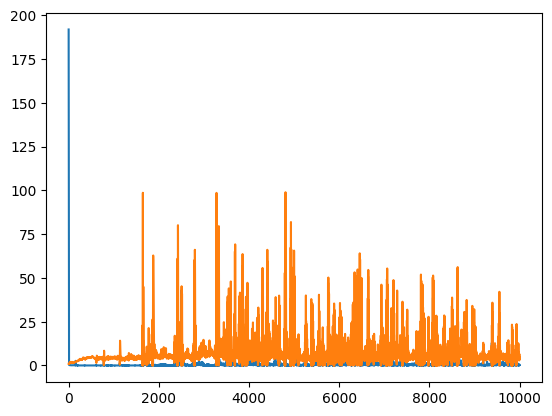

In [44]:
# size of the latent space
latent_dim = 10
# create the discriminator
discriminator = define_discriminator(21)
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)

In [90]:
from keras.models import load_model
model = load_model('trained_generated_model_20210205_v3.h5')

In [206]:
latent_points = generate_latent_points(10, 1000)

In [207]:
x = model.predict(latent_points)

32/32 [==============================] - 0s 3ms/step


In [208]:
data_fake = pd.DataFrame(data = x, columns = ['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker','class'] )

In [209]:
data_fake.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,4.0069,26.0223,-3.4433,6.2964,"1,707.6272",-13.1059,1.9068,-0.1700,3.5916,8.6475,...,-14.2172,44.9197,-11.0557,25.6266,3.3411,13.4606,21.5041,-3.9482,6.3293,1.2130
1,3.9049,24.0559,-2.4376,6.4723,"1,609.7930",-12.7855,3.1247,0.0423,4.0709,8.3860,...,-13.8797,41.8327,-8.9486,24.1348,2.3643,12.0638,20.1630,-2.9644,5.2167,0.9159
2,4.1745,26.2277,-2.4749,6.7221,"1,731.2920",-12.8527,2.8901,0.7425,4.5490,8.2291,...,-14.7229,45.0925,-10.5634,25.7624,3.1968,14.2959,21.4758,-3.6351,6.0245,0.9490
3,3.1495,22.3768,-2.8335,5.9146,"1,462.0684",-10.9960,2.6463,-0.4937,3.5639,7.7681,...,-12.0103,37.3594,-9.5892,21.6138,2.5494,11.2251,18.6156,-2.6807,5.1530,1.1966
4,4.3593,27.9772,-2.8100,7.2867,"1,854.6053",-14.5415,3.6795,-0.6387,4.4606,9.2404,...,-14.8824,47.6414,-10.2968,27.4115,3.3173,14.8552,23.1899,-3.6858,5.8576,0.7145


In [210]:
data_fake['class'].min()

0.15443848

In [211]:
data_fake['class'].max()

3.0143862

In [212]:
class_mean = data_fake['class'].mean()

In [213]:
data_fake['class'] = data_fake['class'] > class_mean

In [214]:
data_fake['class']

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996     True
997     True
998     True
999    False
Name: class, Length: 1000, dtype: bool

In [215]:
data_fake['class'] = data_fake['class'].astype(int)

In [216]:
data_fake.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,4.0069,26.0223,-3.4433,6.2964,"1,707.6272",-13.1059,1.9068,-0.1700,3.5916,8.6475,...,-14.2172,44.9197,-11.0557,25.6266,3.3411,13.4606,21.5041,-3.9482,6.3293,0
1,3.9049,24.0559,-2.4376,6.4723,"1,609.7930",-12.7855,3.1247,0.0423,4.0709,8.3860,...,-13.8797,41.8327,-8.9486,24.1348,2.3643,12.0638,20.1630,-2.9644,5.2167,0
2,4.1745,26.2277,-2.4749,6.7221,"1,731.2920",-12.8527,2.8901,0.7425,4.5490,8.2291,...,-14.7229,45.0925,-10.5634,25.7624,3.1968,14.2959,21.4758,-3.6351,6.0245,0
3,3.1495,22.3768,-2.8335,5.9146,"1,462.0684",-10.9960,2.6463,-0.4937,3.5639,7.7681,...,-12.0103,37.3594,-9.5892,21.6138,2.5494,11.2251,18.6156,-2.6807,5.1530,0
4,4.3593,27.9772,-2.8100,7.2867,"1,854.6053",-14.5415,3.6795,-0.6387,4.4606,9.2404,...,-14.8824,47.6414,-10.2968,27.4115,3.3173,14.8552,23.1899,-3.6858,5.8576,0


In [218]:

x_fake_created = data_fake[features]
y_fake_created = data_fake[label]

In [219]:
x_fake_train, x_fake_test, y_fake_train, y_fake_test = train_test_split(x_fake_created, y_fake_created, test_size=0.30, random_state=42)
clf_fake = RandomForestClassifier(n_estimators=100)
clf_fake.fit(x_fake_train, y_fake_train)

y_fake_pred = clf_fake.predict(x_fake_test)
print("Accuracy of fake data model: ", metrics.accuracy_score(y_fake_test, y_fake_pred))
print("Classification report of fake data model: ", metrics.classification_report(y_fake_test, y_fake_pred))

C:\Users\arnab\AppData\Local\Temp\ipykernel_11796\2283433314.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_fake.fit(x_fake_train, y_fake_train)


Accuracy of fake data model:  0.84
Classification report of fake data model:                precision    recall  f1-score   support

           0       0.85      0.85      0.85       165
           1       0.82      0.82      0.82       135

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [220]:
x_final = x[:, :20]
print('x_final: ', x_final[:3])

y_final = x[:, :]
print('y_final: ', y_final[:3])

x_final:  [[ 4.0068774e+00  2.6022263e+01 -3.4433389e+00  6.2963705e+00
   1.7076272e+03 -1.3105921e+01  1.9067643e+00 -1.6999519e-01
   3.5916071e+00  8.6475153e+00  3.3996236e+00 -1.4217228e+01
   4.4919735e+01 -1.1055687e+01  2.5626616e+01  3.3410950e+00
   1.3460551e+01  2.1504066e+01 -3.9482157e+00  6.3293133e+00]
 [ 3.9049411e+00  2.4055927e+01 -2.4375994e+00  6.4722877e+00
   1.6097930e+03 -1.2785515e+01  3.1246822e+00  4.2308435e-02
   4.0709405e+00  8.3860407e+00  3.1616745e+00 -1.3879689e+01
   4.1832726e+01 -8.9485502e+00  2.4134800e+01  2.3642876e+00
   1.2063814e+01  2.0162971e+01 -2.9643548e+00  5.2166910e+00]
 [ 4.1745315e+00  2.6227707e+01 -2.4748585e+00  6.7220621e+00
   1.7312920e+03 -1.2852748e+01  2.8900592e+00  7.4250042e-01
   4.5490294e+00  8.2290668e+00  2.9312570e+00 -1.4722934e+01
   4.5092548e+01 -1.0563380e+01  2.5762379e+01  3.1967928e+00
   1.4295873e+01  2.1475754e+01 -3.6350749e+00  6.0245123e+00]]
y_final:  [[ 4.0068774e+00  2.6022263e+01 -3.4433389e+00

In [221]:
x = x[:, :20]

In [222]:
y_fake_pred = clf_true.predict(x)

C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [223]:
y_fake_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [224]:
data_fake.shape

(1000, 21)

In [225]:
data.shape

(1000, 21)

In [226]:
data_fake.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,4.0069,26.0223,-3.4433,6.2964,"1,707.6272",-13.1059,1.9068,-0.1700,3.5916,8.6475,...,-14.2172,44.9197,-11.0557,25.6266,3.3411,13.4606,21.5041,-3.9482,6.3293,0
1,3.9049,24.0559,-2.4376,6.4723,"1,609.7930",-12.7855,3.1247,0.0423,4.0709,8.3860,...,-13.8797,41.8327,-8.9486,24.1348,2.3643,12.0638,20.1630,-2.9644,5.2167,0
2,4.1745,26.2277,-2.4749,6.7221,"1,731.2920",-12.8527,2.8901,0.7425,4.5490,8.2291,...,-14.7229,45.0925,-10.5634,25.7624,3.1968,14.2959,21.4758,-3.6351,6.0245,0
3,3.1495,22.3768,-2.8335,5.9146,"1,462.0684",-10.9960,2.6463,-0.4937,3.5639,7.7681,...,-12.0103,37.3594,-9.5892,21.6138,2.5494,11.2251,18.6156,-2.6807,5.1530,0
4,4.3593,27.9772,-2.8100,7.2867,"1,854.6053",-14.5415,3.6795,-0.6387,4.4606,9.2404,...,-14.8824,47.6414,-10.2968,27.4115,3.3173,14.8552,23.1899,-3.6858,5.8576,0


In [227]:
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [228]:

data_fake=np.round(data_fake).astype(int)
data_fake=pd.DataFrame(data_fake,columns=data_fake.columns)
data_fake

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,4,26,-3,6,1708,-13,2,0,4,9,...,-14,45,-11,26,3,13,22,-4,6,0
1,4,24,-2,6,1610,-13,3,0,4,8,...,-14,42,-9,24,2,12,20,-3,5,0
2,4,26,-2,7,1731,-13,3,1,5,8,...,-15,45,-11,26,3,14,21,-4,6,0
3,3,22,-3,6,1462,-11,3,0,4,8,...,-12,37,-10,22,3,11,19,-3,5,0
4,4,28,-3,7,1855,-15,4,-1,4,9,...,-15,48,-10,27,3,15,23,-4,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,21,-3,5,1320,-11,2,-1,3,7,...,-10,35,-8,20,3,10,18,-3,5,0
996,4,30,-5,7,1916,-16,3,-1,5,11,...,-15,50,-13,29,4,15,26,-4,7,1
997,4,26,-4,6,1691,-13,1,0,3,10,...,-14,45,-11,25,3,13,21,-4,6,1
998,5,30,-3,7,1958,-16,2,0,4,11,...,-18,52,-12,31,3,15,24,-5,8,1


In [184]:
cat_col

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker']

In [154]:
encoded_data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1.0000,6,1.0000,6.0000,1169,4.0000,3.0000,4,3.0000,2.0000,...,3.0000,67,1.0000,1.0000,2,1.0000,1,1.0000,1.0000,1
1,0.0000,48,3.0000,6.0000,5951,2.0000,0.0000,2,0.0000,2.0000,...,3.0000,22,1.0000,1.0000,1,1.0000,1,0.0000,1.0000,0
2,3.0000,12,1.0000,2.0000,2096,2.0000,1.0000,2,3.0000,2.0000,...,3.0000,49,1.0000,1.0000,1,3.0000,2,0.0000,1.0000,1
3,1.0000,42,3.0000,3.0000,7882,2.0000,1.0000,2,3.0000,1.0000,...,1.0000,45,1.0000,0.0000,1,1.0000,2,0.0000,1.0000,1
4,1.0000,24,2.0000,4.0000,4870,2.0000,0.0000,3,3.0000,2.0000,...,2.0000,53,1.0000,0.0000,2,1.0000,2,0.0000,1.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0000,12,3.0000,3.0000,1736,2.0000,1.0000,3,0.0000,2.0000,...,3.0000,31,1.0000,1.0000,1,3.0000,1,0.0000,1.0000,1
996,1.0000,30,3.0000,9.0000,3857,2.0000,0.0000,4,1.0000,2.0000,...,1.0000,40,1.0000,1.0000,1,0.0000,1,1.0000,1.0000,1
997,3.0000,12,3.0000,6.0000,804,2.0000,3.0000,4,3.0000,2.0000,...,0.0000,38,1.0000,1.0000,1,1.0000,1,0.0000,1.0000,1
998,1.0000,45,3.0000,6.0000,1845,2.0000,0.0000,4,3.0000,2.0000,...,2.0000,23,1.0000,0.0000,1,1.0000,1,1.0000,1.0000,0


In [198]:


# Create an instance of the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit the encoder on the original dataset
encoder.fit(encoded_data[cat_col])

# Get the unique classes for each category
unique_classes = [list(encoder.categories_[i]) for i in range(len(encoder.categories_))]

# Replace extra classes with nearest known classes in the synthetic dataset
#encoded_syn_data = encoder.transform(syn_data[cat_cols])
decoded_syn_data = data_fake.copy()

for i, col in enumerate(cat_col):
    unique_col_classes = unique_classes[i]
    max_class = max(unique_col_classes)

    # Identify extra classes in the synthetic dataset
    extra_classes = set(decoded_syn_data[col]) - set(unique_col_classes)

    for extra_class in extra_classes:
        # Find the nearest known class
        nearest_class = min(unique_col_classes, key=lambda x: abs(x - extra_class))

        # Replace the extra class with the nearest known class
        decoded_syn_data[col] = np.where(decoded_syn_data[col] == extra_class, nearest_class, decoded_syn_data[col])

# Create a DataFrame with the decoded synthetic data
decoded_syn_data = pd.DataFrame(decoded_syn_data, columns=cat_col)

# Display the decoded synthetic data
print(decoded_syn_data)


     checking_status  credit_history  purpose  savings_status  employment  \
0             3.0000          0.0000   6.0000          0.0000      2.0000   
1             3.0000          0.0000   6.0000          0.0000      3.0000   
2             3.0000          0.0000   7.0000          0.0000      3.0000   
3             3.0000          0.0000   6.0000          0.0000      3.0000   
4             3.0000          0.0000   7.0000          0.0000      4.0000   
..               ...             ...      ...             ...         ...   
995           3.0000          0.0000   5.0000          0.0000      2.0000   
996           3.0000          0.0000   7.0000          0.0000      3.0000   
997           3.0000          0.0000   6.0000          0.0000      1.0000   
998           3.0000          0.0000   7.0000          0.0000      2.0000   
999           3.0000          0.0000   5.0000          0.0000      2.0000   

     personal_status  other_parties  property_magnitude  other_payment_plan

In [199]:
syn_data=data_fake

syn_data[cat_col]=decoded_syn_data

In [120]:
from table_evaluator import load_data, TableEvaluator

In [200]:
table_evaluator = TableEvaluator(encoded_data,syn_data )

In [201]:
table_evaluator.evaluate(target_col='class')

C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\table_evaluator\metrics.py:95: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  distances = Parallel(n_jobs=-1)(



Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.5250   0.6550              0.2987
DecisionTreeClassifier_real   0.6150   0.4300              0.2618
LogisticRegression_fake       0.5600   0.7500              0.3889
LogisticRegression_real       0.6750   0.5000              0.2698
MLPClassifier_fake            0.4400   0.4450              0.9900
MLPClassifier_real            0.6850   0.5550              0.5152
RandomForestClassifier_fake   0.4500   0.7100              0.2821
RandomForestClassifier_real   0.7250   0.4200              0.1869

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 8)
nearest neighbor mean                       NaN
nearest neighbor std                        NaN

Miscellaneous results:
                                  Result
Column Cor

C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\table_evaluator\metrics.py:121: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  distances = Parallel(n_jobs=-1)(


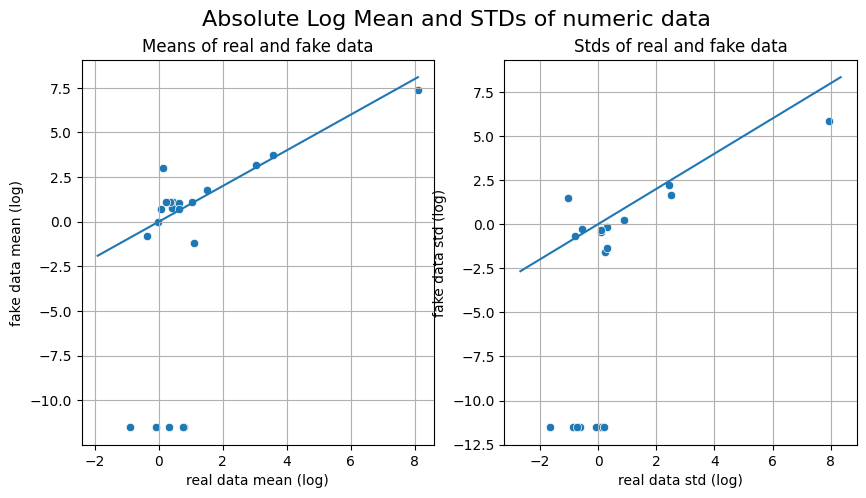

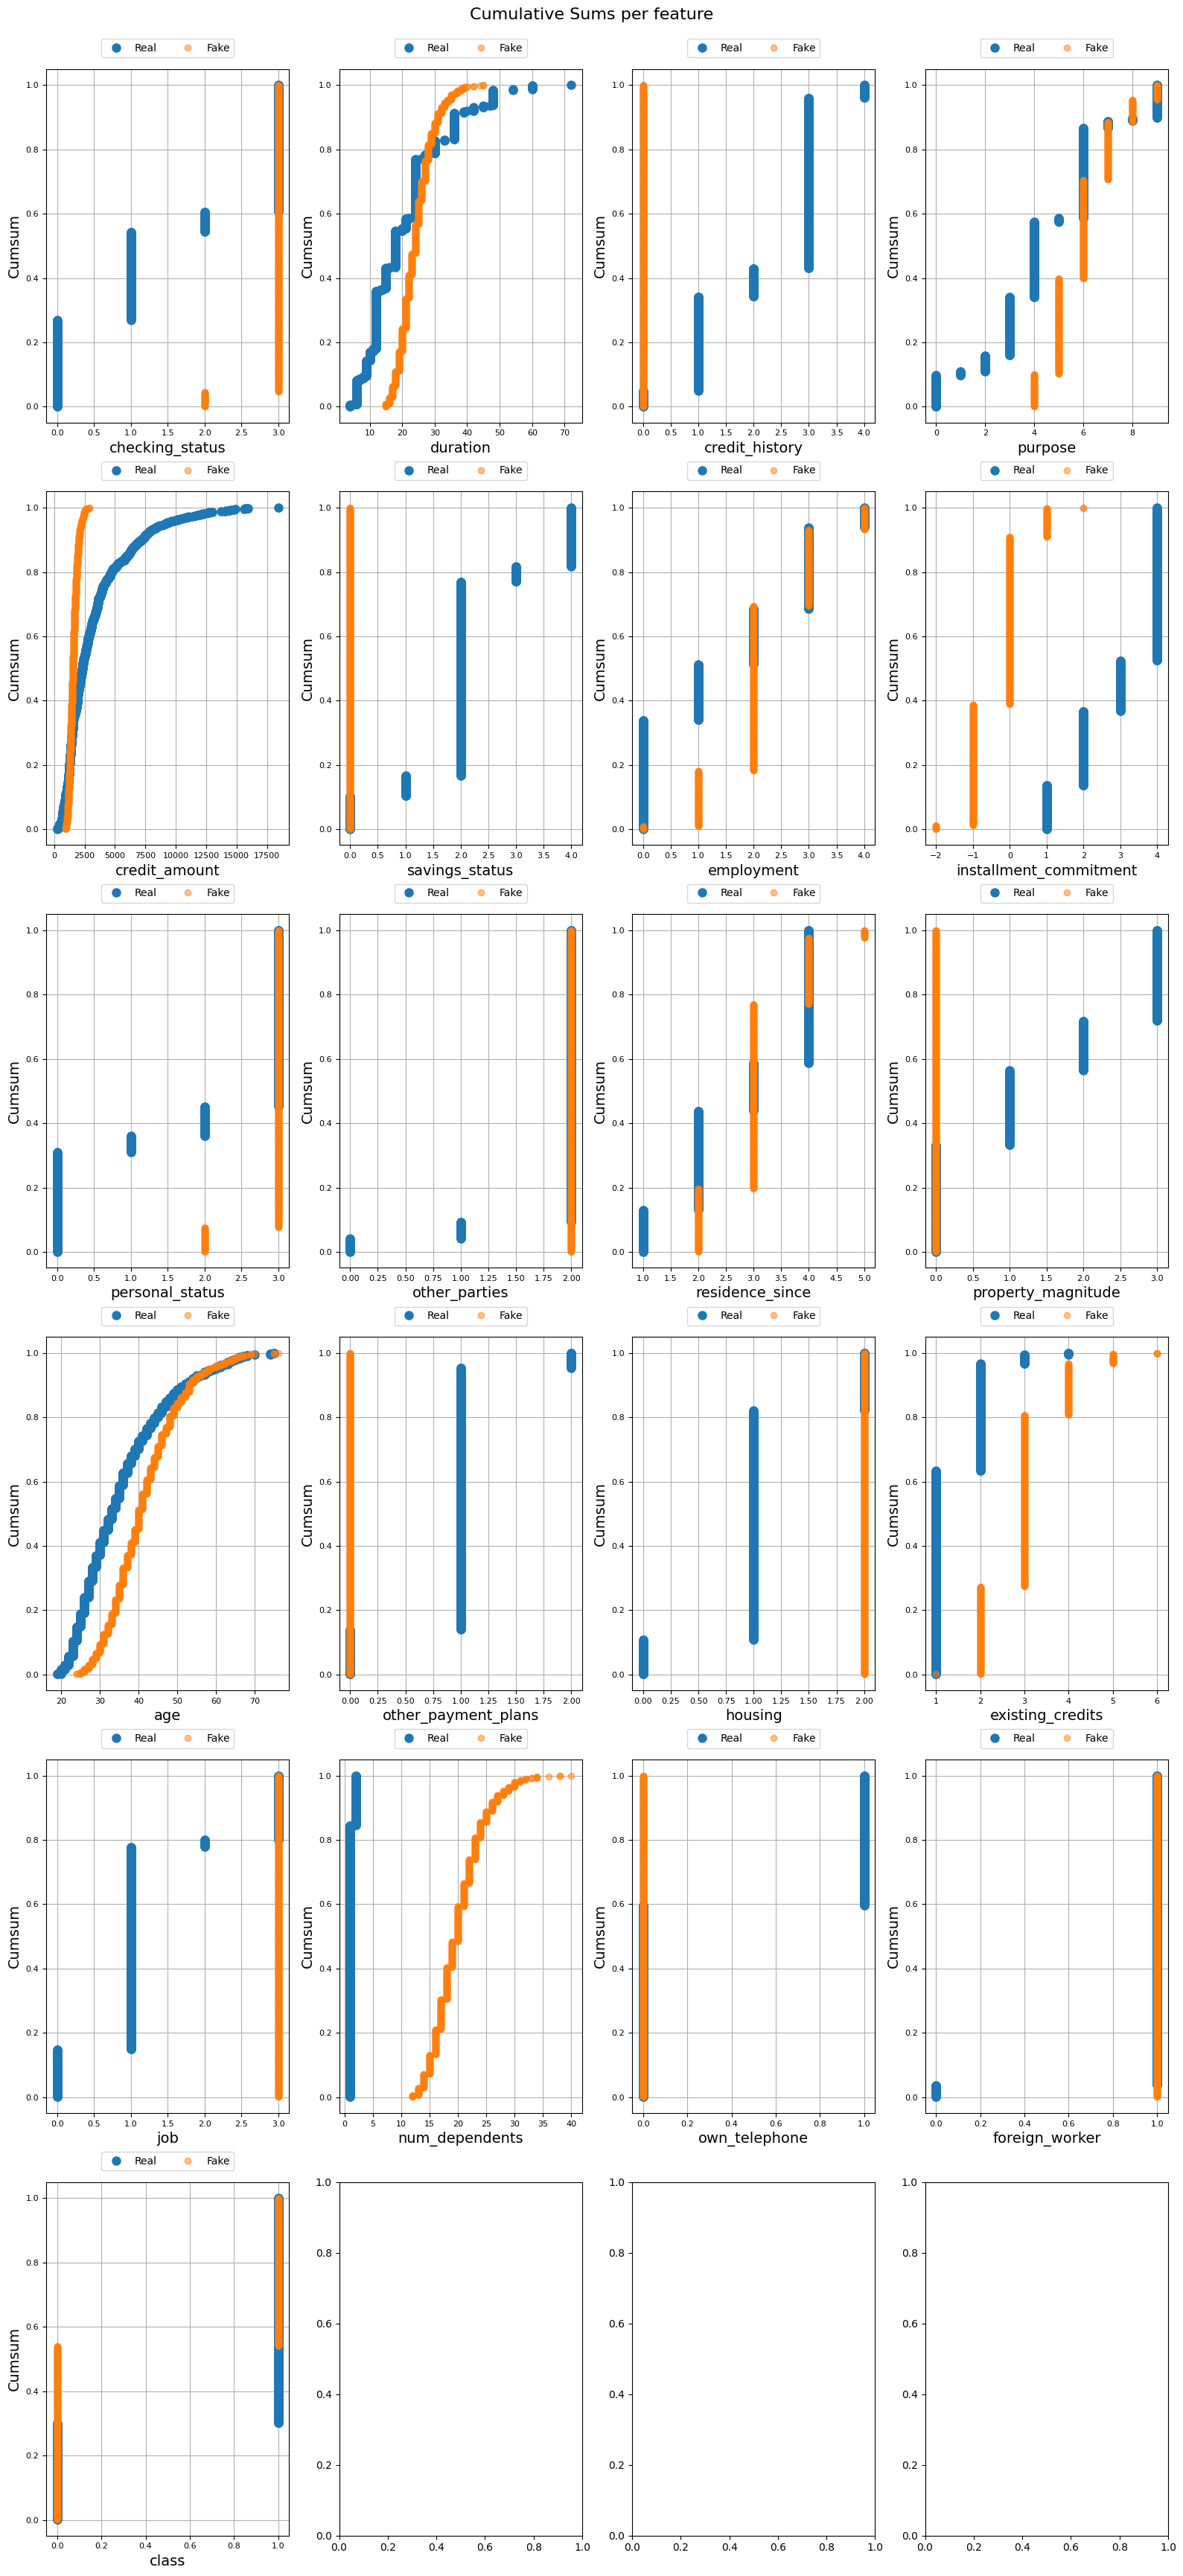

C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

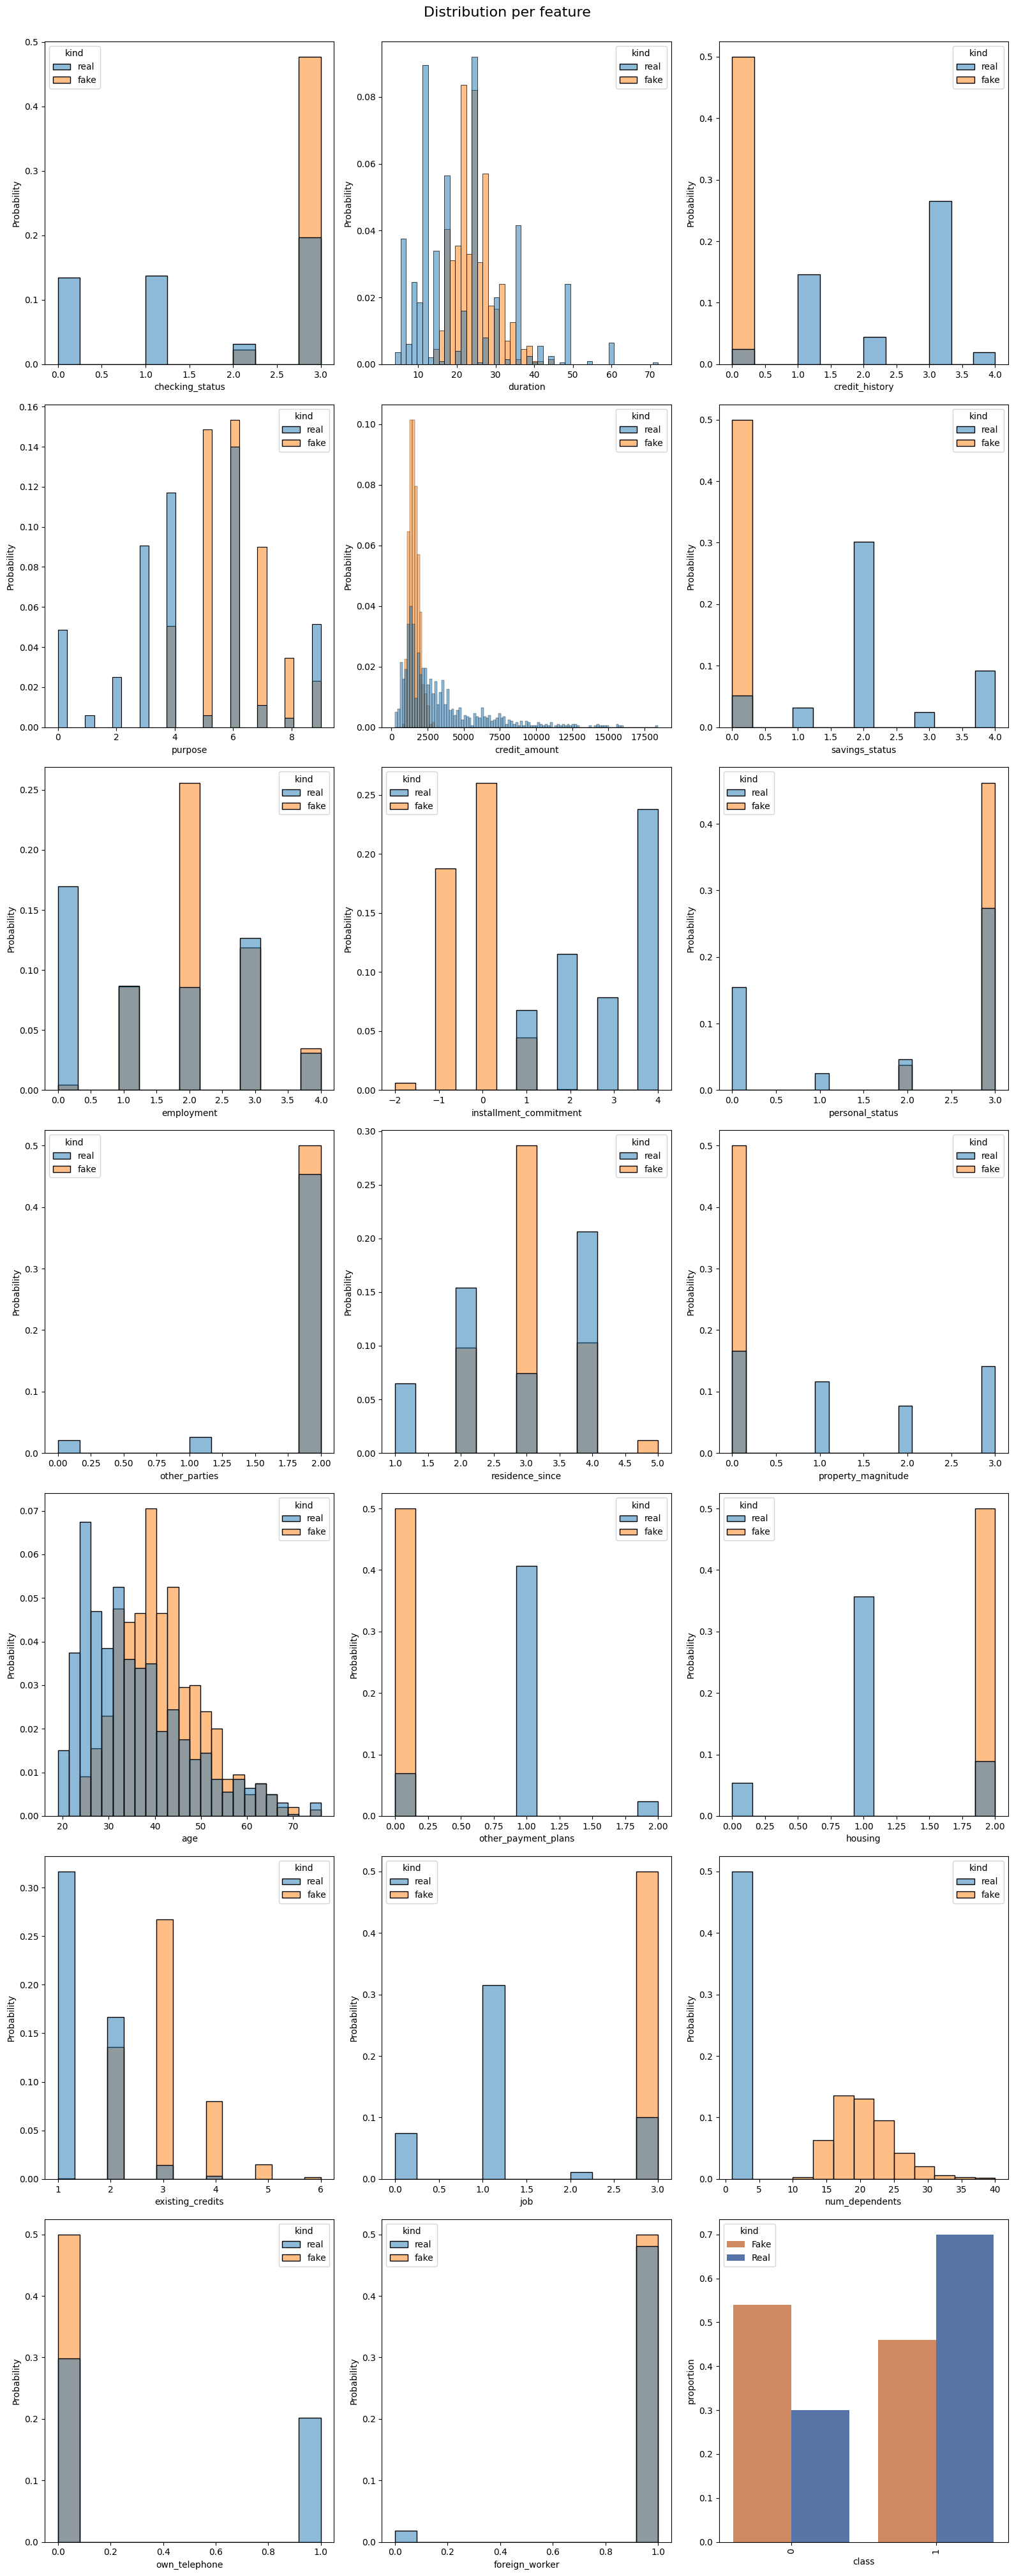

TypeError: Image data of dtype object cannot be converted to float

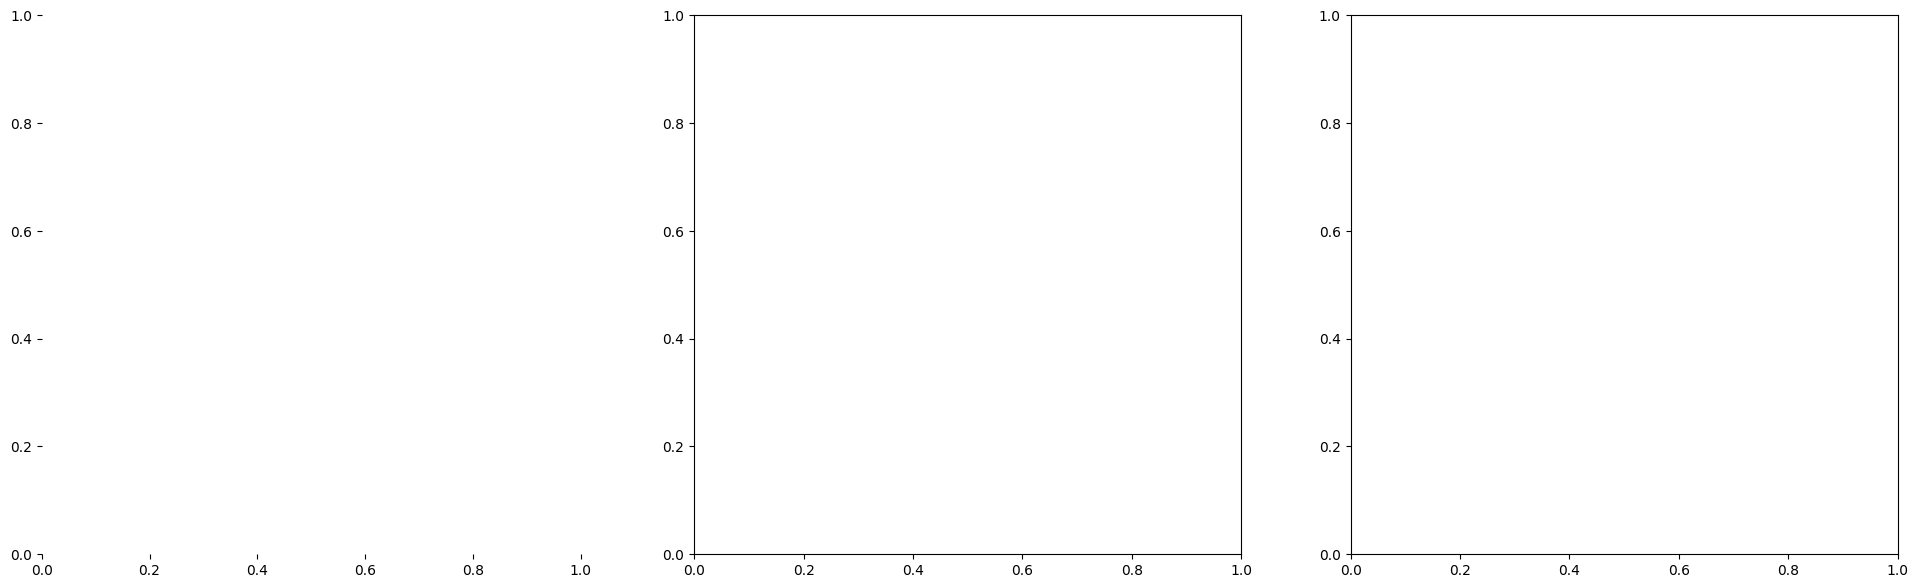

In [202]:
table_evaluator.visual_evaluation()

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (2).

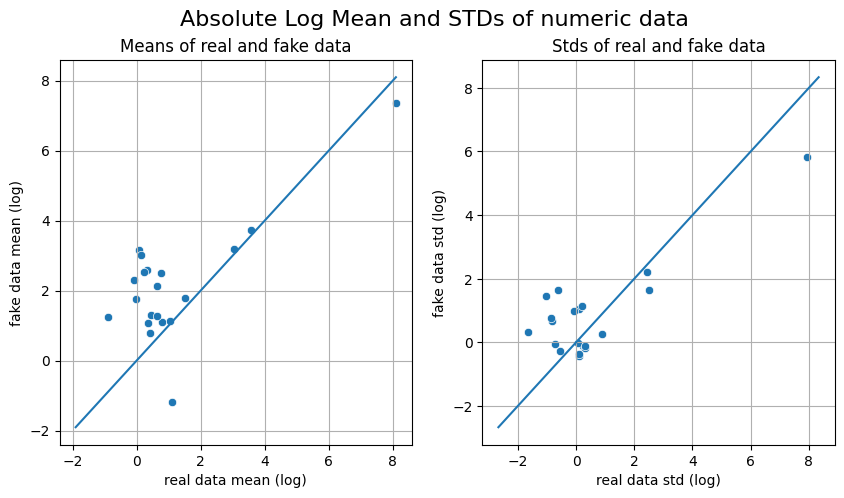

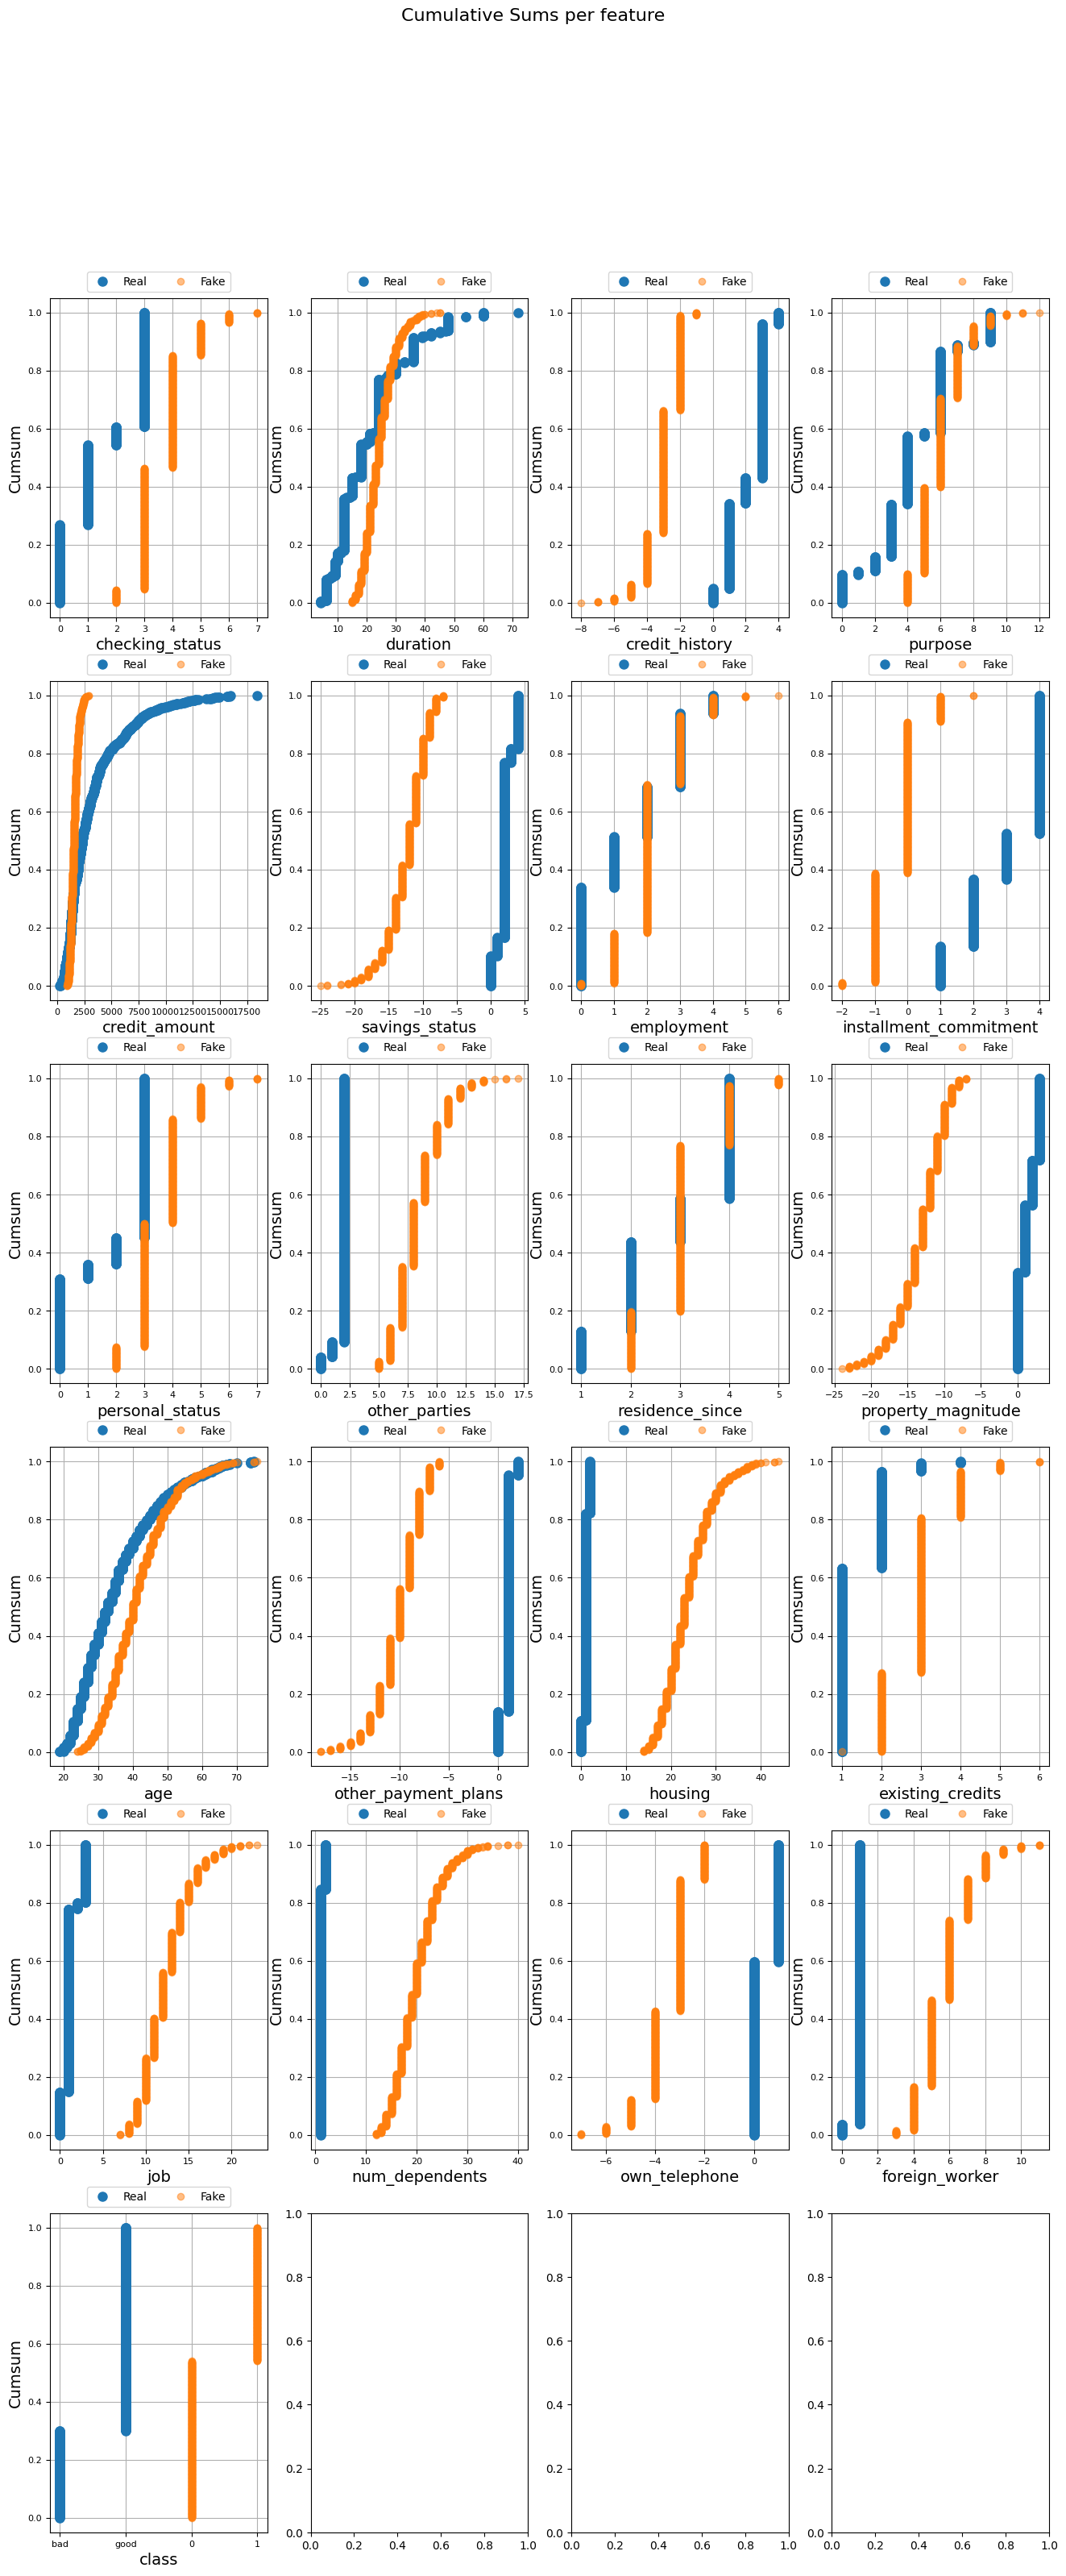

In [229]:
table_evaluator2 = TableEvaluator(encoded_data,data_fake )
table_evaluator2.visual_evaluation()

In [205]:
encoded_data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1.0000,6,1.0000,6.0000,1169,4.0000,3.0000,4,3.0000,2.0000,...,3.0000,67,1.0000,1.0000,2,1.0000,1,1.0000,1.0000,good
1,0.0000,48,3.0000,6.0000,5951,2.0000,0.0000,2,0.0000,2.0000,...,3.0000,22,1.0000,1.0000,1,1.0000,1,0.0000,1.0000,bad
2,3.0000,12,1.0000,2.0000,2096,2.0000,1.0000,2,3.0000,2.0000,...,3.0000,49,1.0000,1.0000,1,3.0000,2,0.0000,1.0000,good
3,1.0000,42,3.0000,3.0000,7882,2.0000,1.0000,2,3.0000,1.0000,...,1.0000,45,1.0000,0.0000,1,1.0000,2,0.0000,1.0000,good
4,1.0000,24,2.0000,4.0000,4870,2.0000,0.0000,3,3.0000,2.0000,...,2.0000,53,1.0000,0.0000,2,1.0000,2,0.0000,1.0000,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0000,12,3.0000,3.0000,1736,2.0000,1.0000,3,0.0000,2.0000,...,3.0000,31,1.0000,1.0000,1,3.0000,1,0.0000,1.0000,good
996,1.0000,30,3.0000,9.0000,3857,2.0000,0.0000,4,1.0000,2.0000,...,1.0000,40,1.0000,1.0000,1,0.0000,1,1.0000,1.0000,good
997,3.0000,12,3.0000,6.0000,804,2.0000,3.0000,4,3.0000,2.0000,...,0.0000,38,1.0000,1.0000,1,1.0000,1,0.0000,1.0000,good
998,1.0000,45,3.0000,6.0000,1845,2.0000,0.0000,4,3.0000,2.0000,...,2.0000,23,1.0000,0.0000,1,1.0000,1,1.0000,1.0000,bad
